  ###  <center><span style="color:#a1341c"> AUTO TRADER CAR PRICE PREDICTION REPORT.</span>

   ###  <center><span style="color:#a1341c"> NAME: OPEYEMI ENOCK ADENIYI.</span>

  ### <center><span style="color:#a1341c">ID: 22548137.</span>

#### Problem Statement

 A Car Sale Adverts dataset provided by **AutoTrader**. I am asked to produce a regression model for predicting the selling price given the characteristics of the cars in the historical data given.

> ## <span style="color:#a1341c"> Importing Required Libraries. </span>
>
>>Importing all the necessary Library here.

In [1]:
!pip install --upgrade scikit-learn -q --user

In [2]:
!pip install -q shap
import shap
shap.initjs()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks', 
    context='talk', 
    font_scale=0.8, 
    rc={'figure.figsize': (8,5)}
)

In [4]:
from scipy import stats
import datetime
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,ParameterGrid
from sklearn.tree import DecisionTreeRegressor
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_text

> ## <span style="color:#a1341c"> Loading/Reading and Understanding the Dataset. </span>
>
>> I am using pandas to load my data from my local hard disk using **read_csv** and I also view the data using **head** function.

In [5]:
autotrader = pd.read_csv('adverts.csv')

In [6]:
autotrader.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0      NaN            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   

   crossover_car_and_van              fuel_type  
0                  False  Petrol Plug-in Hybrid

In [7]:
autotrader.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [8]:
autotrader.shape

(402005, 12)

In [9]:
autotrader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


> ## <span style="color:#a1341c"> 1. Data/Domain Understanding and Exploration.</span>
>
>> **1.1 Meaning and Type of Features; Analysis of Univariate Distributions (3-4)**


#### Meaning and Types of Features.

From above we used  autotrader.columns which shows we have 12 columns in our dataset, 5 from the columns are explained below:  
- **Mileage** is the actual number of miles covered by the car, and it is a **Quantitative** Feature.  
- **standard_make** refers to the brand of the vehicle(Producer name), and it is a **Categorical** Feature.  
- **body_type** refers to the category of a vehicle base on its design, shape and space. and it is a **Categorical** Feature.  
- **year_of_registration** Refers to the year when the car was first registered by a user. and it is a **Quantitative** Feature.  
- **fuel_type** is the general category of fuel and can either be gasoline or natural gas. and it is a **Categorical** Feature.

#### Analysis of Univariate Distribution

The analysis of univariate distributions typically includes the examination of measures such as the mean, median, mode, variance, and skewness of the distribution, Also it will be analysed by using plots.

In [10]:
autotrader.drop(columns='public_reference').describe()

mileage  year_of_registration         price
count  401878.000000         368694.000000  4.020050e+05
mean    37743.595656           2015.006206  1.734197e+04
std     34831.724018              7.962667  4.643746e+04
min         0.000000            999.000000  1.200000e+02
25%     10481.000000           2013.000000  7.495000e+03
50%     28629.500000           2016.000000  1.260000e+04
75%     56875.750000           2018.000000  2.000000e+04
max    999999.000000           2020.000000  9.999999e+06

From above we can see the mean, median, max(mode) and standard deviation listed for mileage, year_of_registeration and price, maximum mileage in the data is 999999, mean year of registeration is 7.9 etc. We can as well determine the skewness of the above columns using Pearson's moment coefficient of skewness shown below:

In [11]:
mean = autotrader[['price','mileage','year_of_registration']].mean()
median = autotrader[['price','mileage','year_of_registration']].median()
std = autotrader[['price','mileage','year_of_registration']].std()
#Pearson's moment coefficient of skewness
skewness = (3 * (mean - median)) / std

In [12]:
skewness

price                   0.306345
mileage                 0.784982
year_of_registration   -0.374420
dtype: float64

Price and mileage are both positively skewed, which mean the shape of the distribution is right-skewed and year_of_registeration has a negative skew which also indicate it is left-skewed.

#### Analysing the Univariant Distribution with plots

Before ploting I decide to create a column for log_price to make my graph better.

In [13]:
autotrader['log_price'] = np.log(autotrader['price'])

In [14]:
autotrader.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0      NaN            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  
0                  False  Petrol Plug-in Hybrid  11.211415

#### Analysis of Price Distribution.

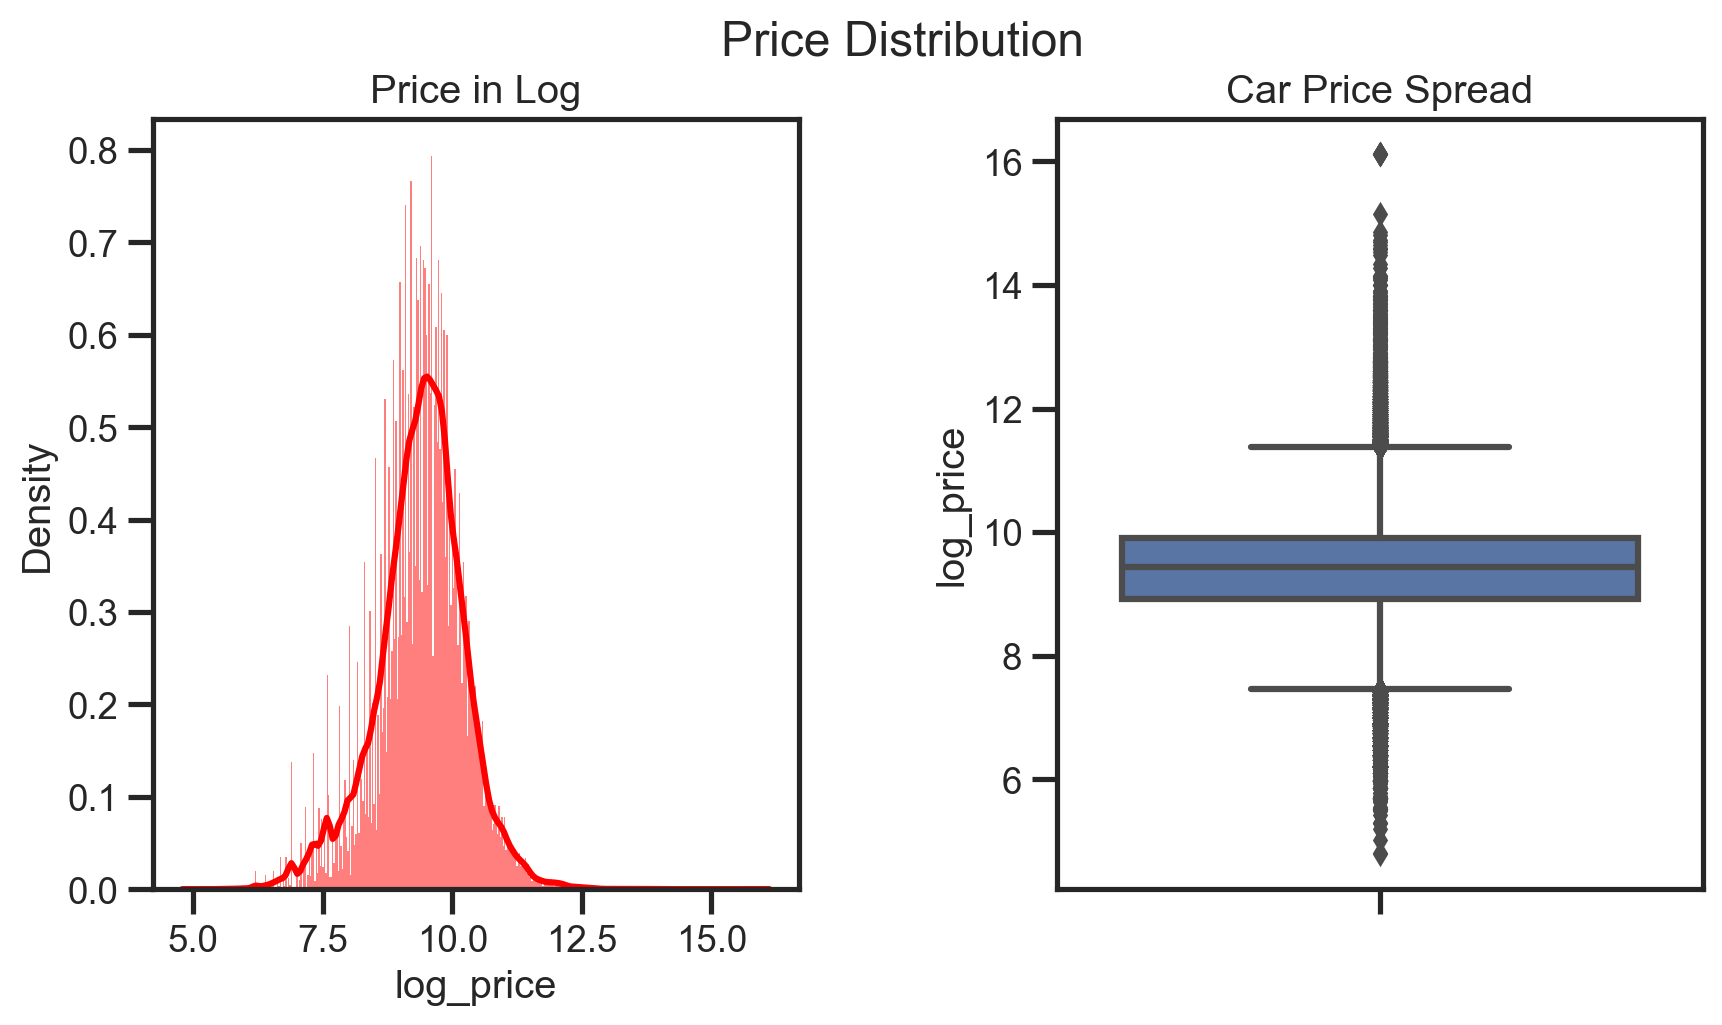

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Price Distribution')


sns.histplot(autotrader.log_price, ax=axs[0], color='red', label='100% Equities', kde=True, stat='density', linewidth=0)
axs[0].set_title('Price in Log')

sns.boxplot(y=autotrader.log_price, ax=axs[1])
axs[1].set_title('Car Price Spread')

plt.subplots_adjust(wspace=0.4)

#### Analysis of Mileage Distribution.

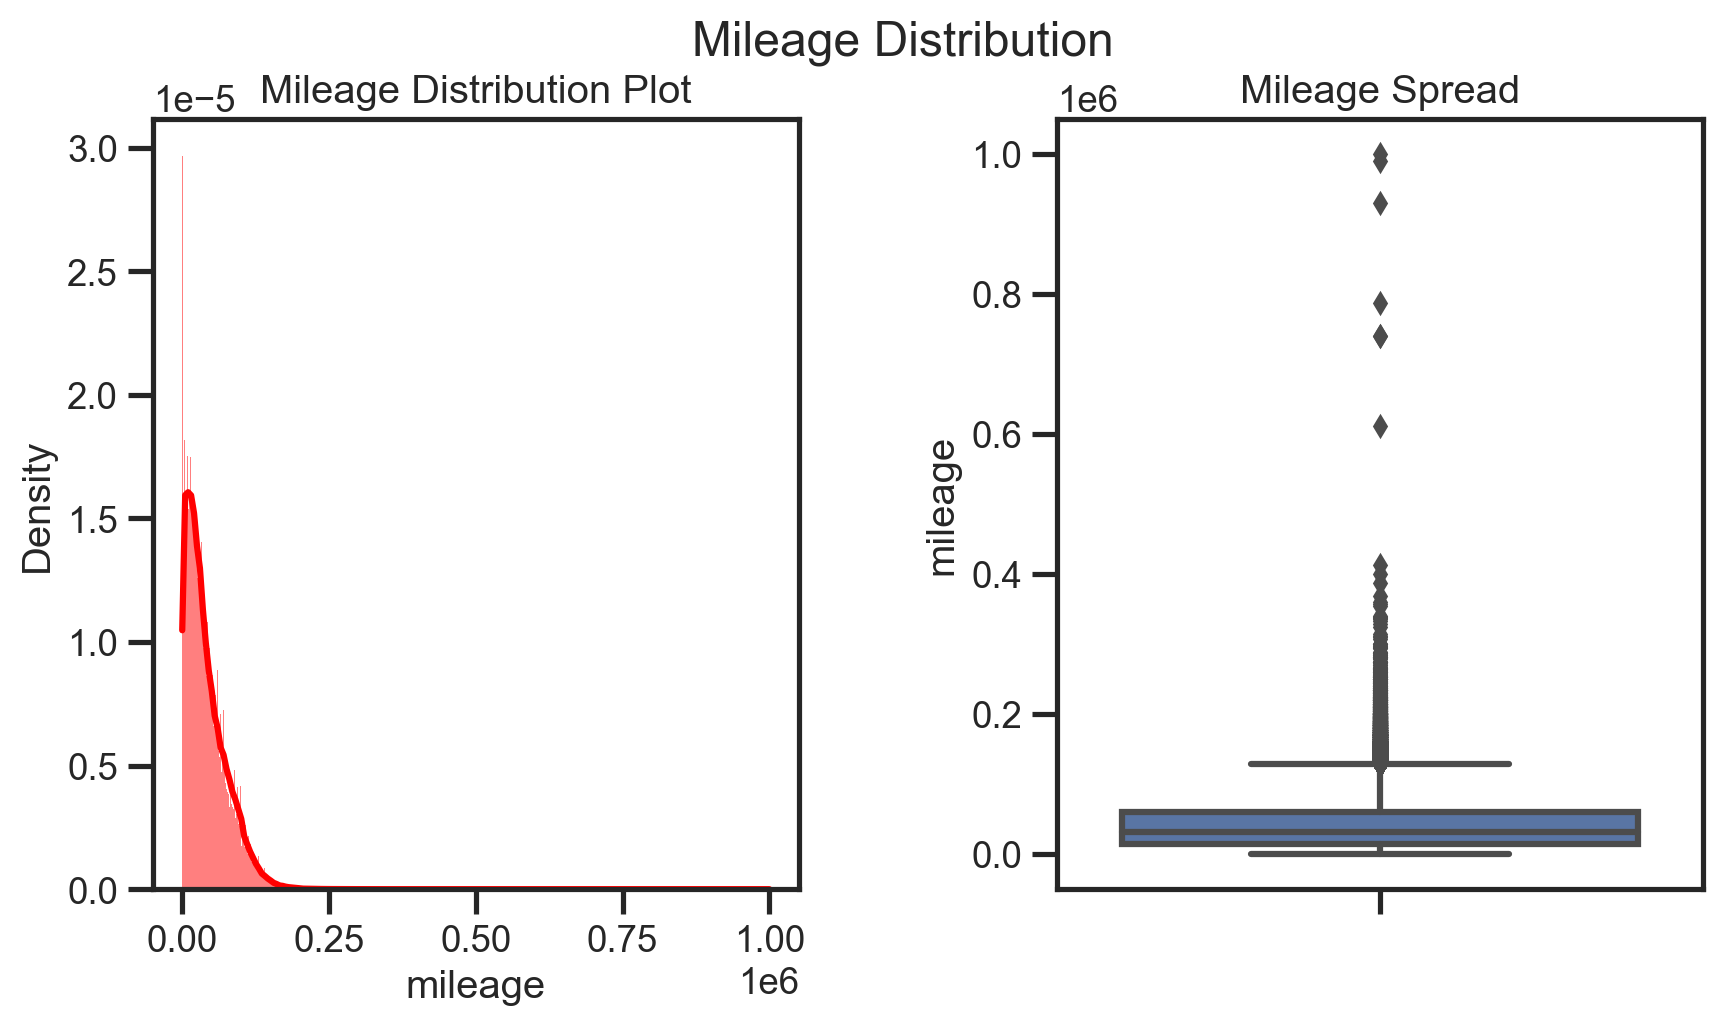

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Mileage Distribution')

sns.histplot(autotrader.dropna().mileage, ax=axs[0], color='red', label='100% Equities', kde=True, stat='density', linewidth=0)
axs[0].set_title('Mileage Distribution Plot')

sns.boxplot(y=autotrader.dropna().mileage, ax=axs[1])
axs[1].set_title('Mileage Spread')

plt.subplots_adjust(wspace=0.4)



We can clearly see that the mileage is skewed to the right, and there is some outliers showing from the boxplot.

#### Analysis of Body Type , Fuel Type and Standard colour Distribution.

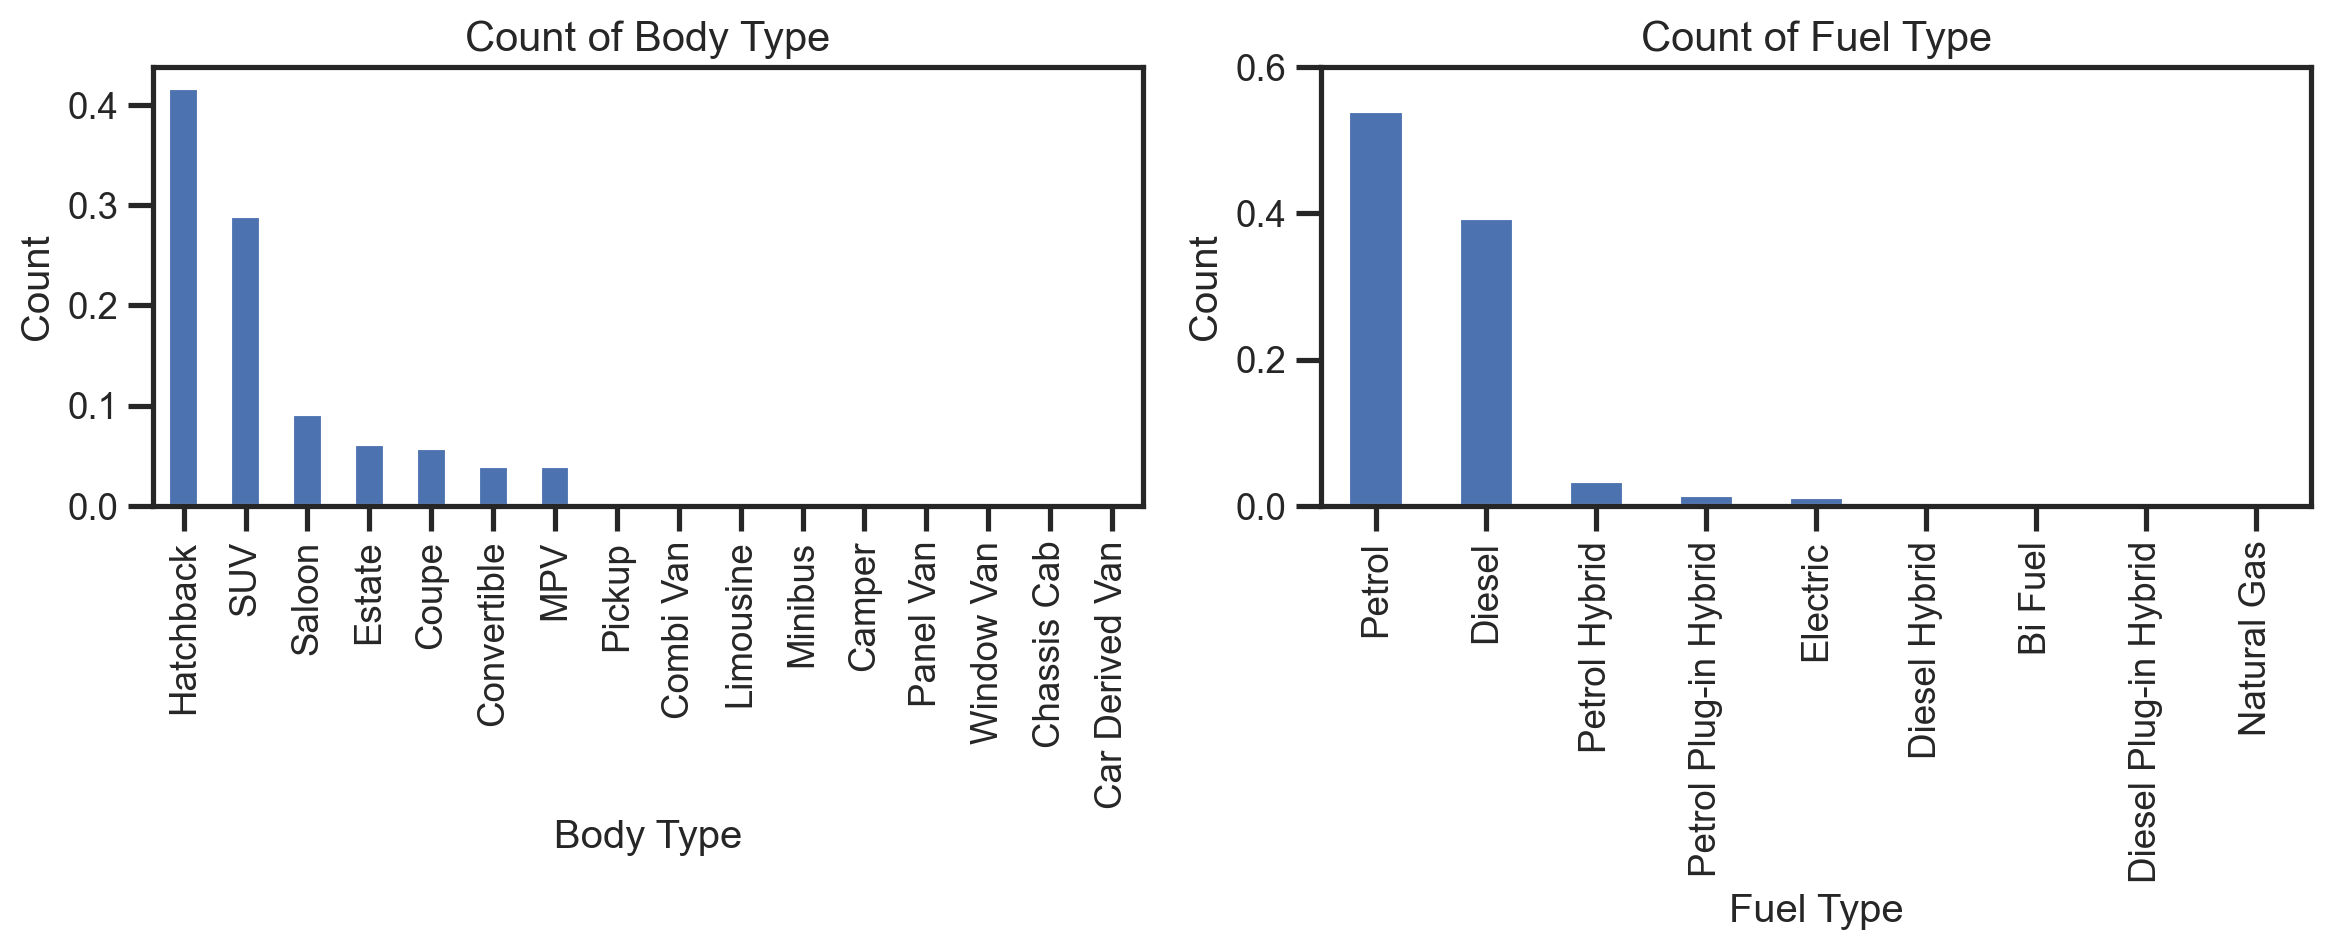

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
autotrader['body_type'].value_counts(normalize=True).plot.bar()
plt.title("Count of Body Type",size=15)
plt.xlabel("Body Type")
plt.ylabel("Count")
#lt.xticks(rotation=45)

plt.subplot(1,2,2)
autotrader['fuel_type'].value_counts(normalize=True).plot.bar()
plt.title("Count of Fuel Type",size=15)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
#plt.xticks(rotation=45)
plt.ylim([0, 0.6])

plt.tight_layout()



Clearly it is shown here that we have more vehicles with Hackback, followed by SUV.From the second graph Petrol has more count of vehicle followed by the Diesel

Text(0, 0.5, 'Count')

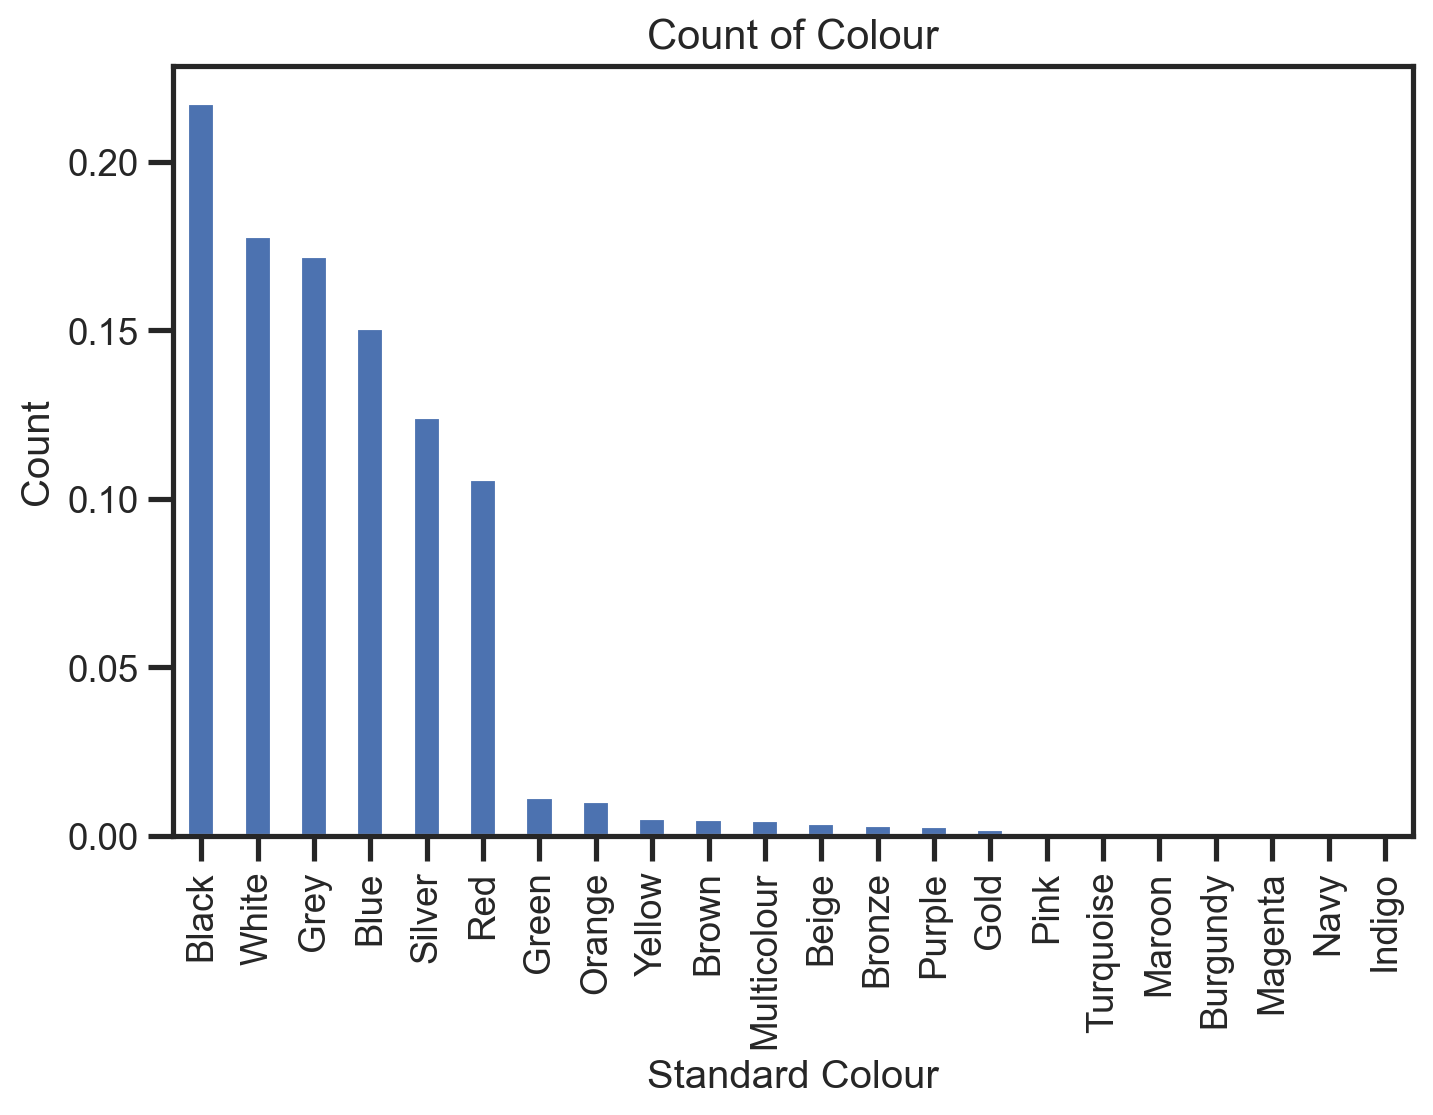

In [18]:
autotrader['standard_colour'].value_counts(normalize=True).plot.bar()
plt.title("Count of Colour",size=15)
plt.xlabel("Standard Colour")
plt.ylabel("Count")

Black colour vehicle is the most purchased, followed by white and grey.

> ## <span style="color:#a1341c"> 1. Data/Domain Understanding and Exploration</span>
>
>>**1.2. Analysis of Predictive Power of Features (2-3)**


In [19]:
autotrader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
 12  log_price              402005 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 37.2+ MB


#### Explore Continuous/Quantitative Features

We will have to plot the 2 countinous feature, Mileage and year_of_registeration against our target(Price).

<Axes: xlabel='year_of_registration', ylabel='log_price'>

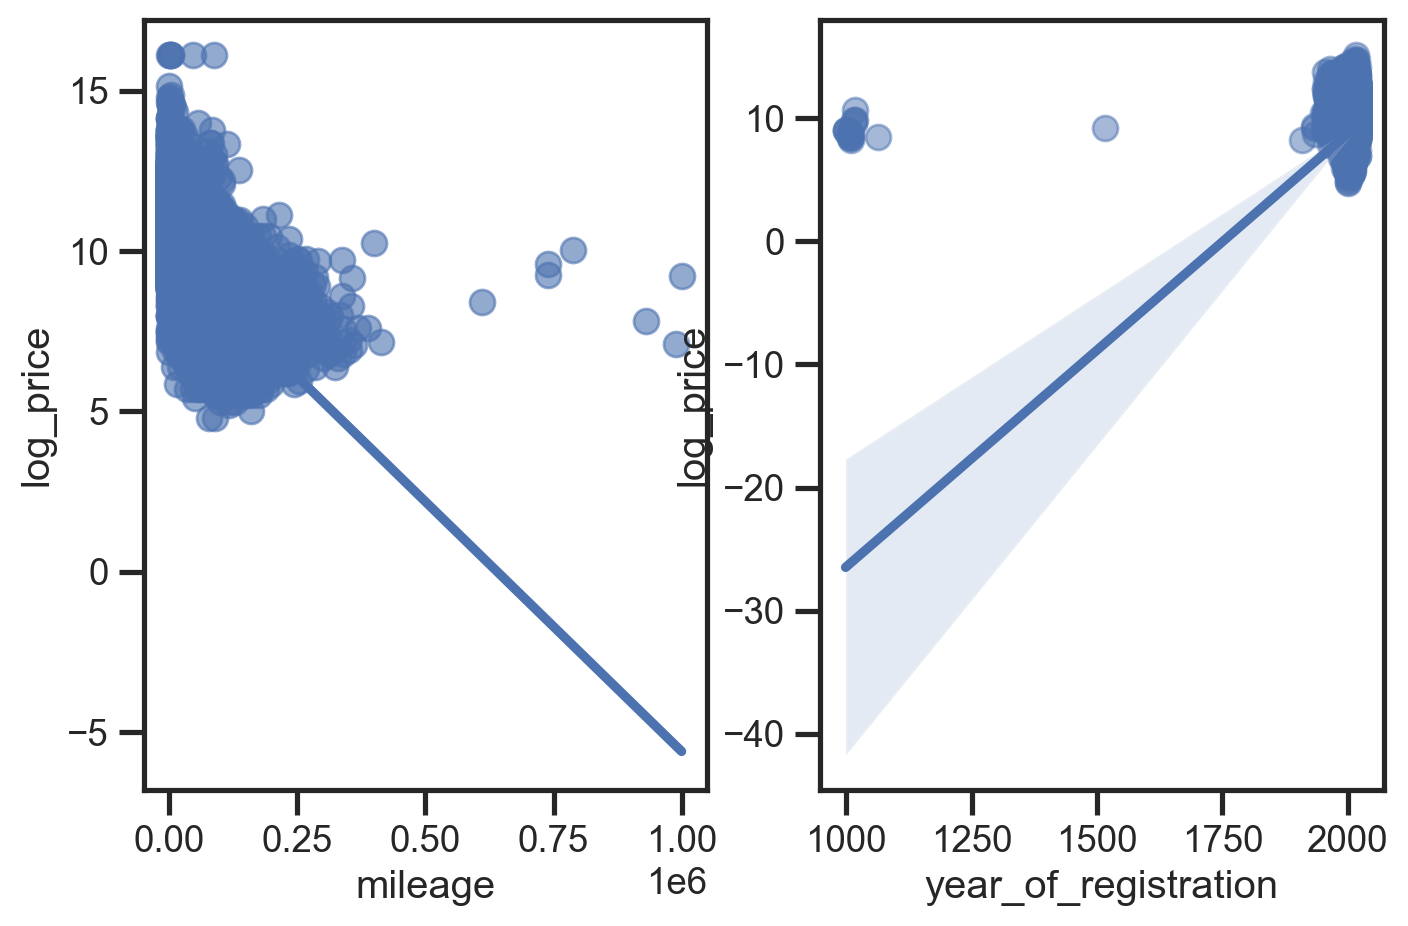

In [20]:
plt.subplot(1,2,1)
sns.regplot(data=autotrader, x='mileage', y='log_price', scatter_kws={'alpha': 0.6})

plt.subplot(1,2,2)
sns.regplot(data=autotrader, x='year_of_registration', y='log_price',scatter_kws={'alpha': 0.5})

The plot above shows the importance/correlation of both mileage and year_of_registration to price, The higher the mileage the lower the price and the more recent the year of registeration is the higher the price.

#### Explore Some Categorical Features

In [21]:
autotrader_some_cat =['standard_colour','body_type','fuel_type']

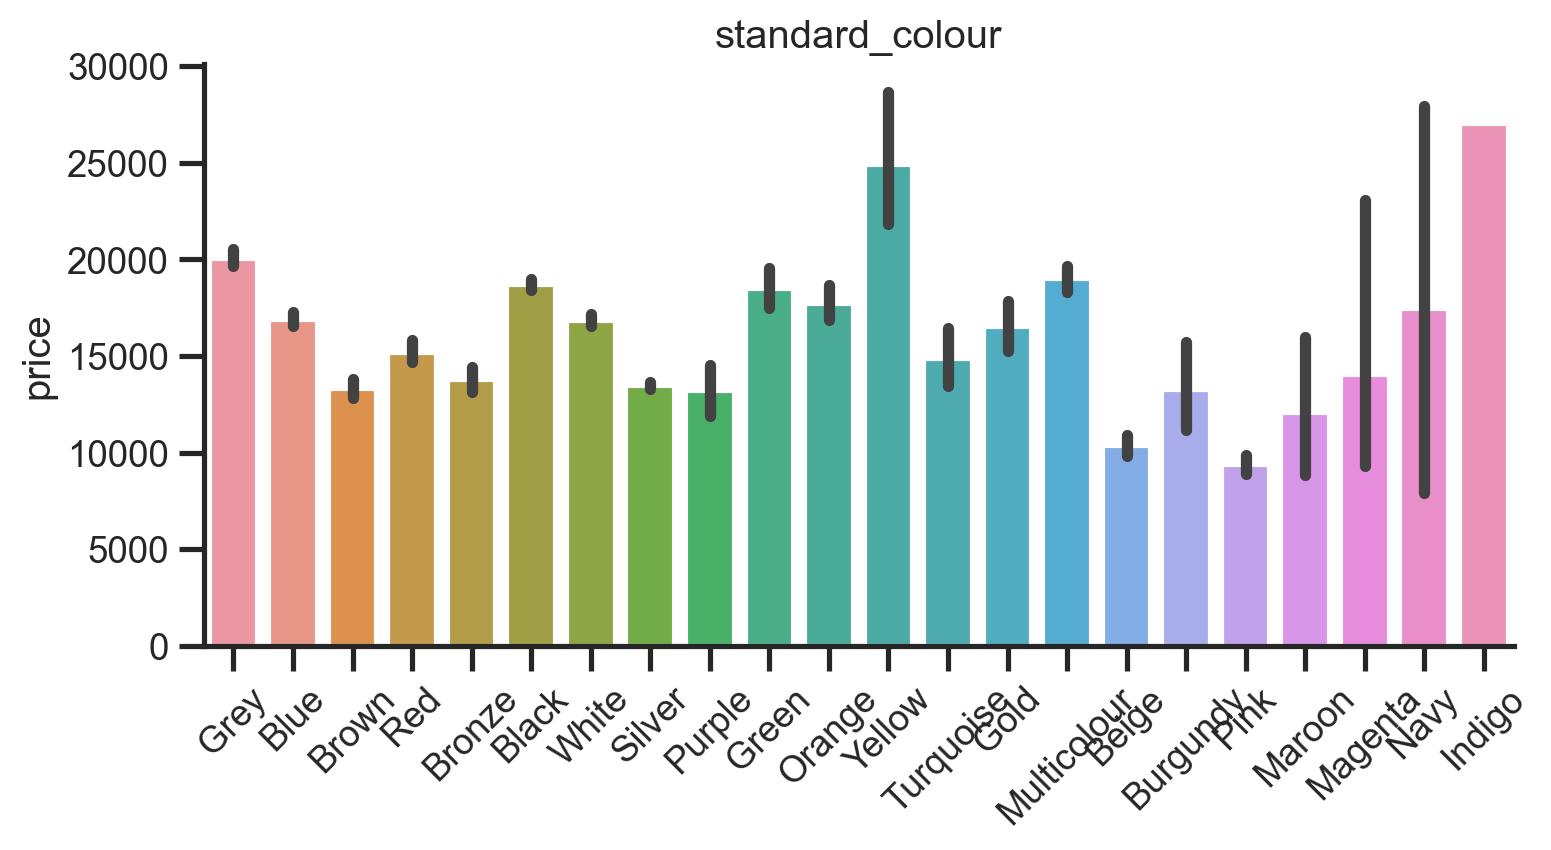

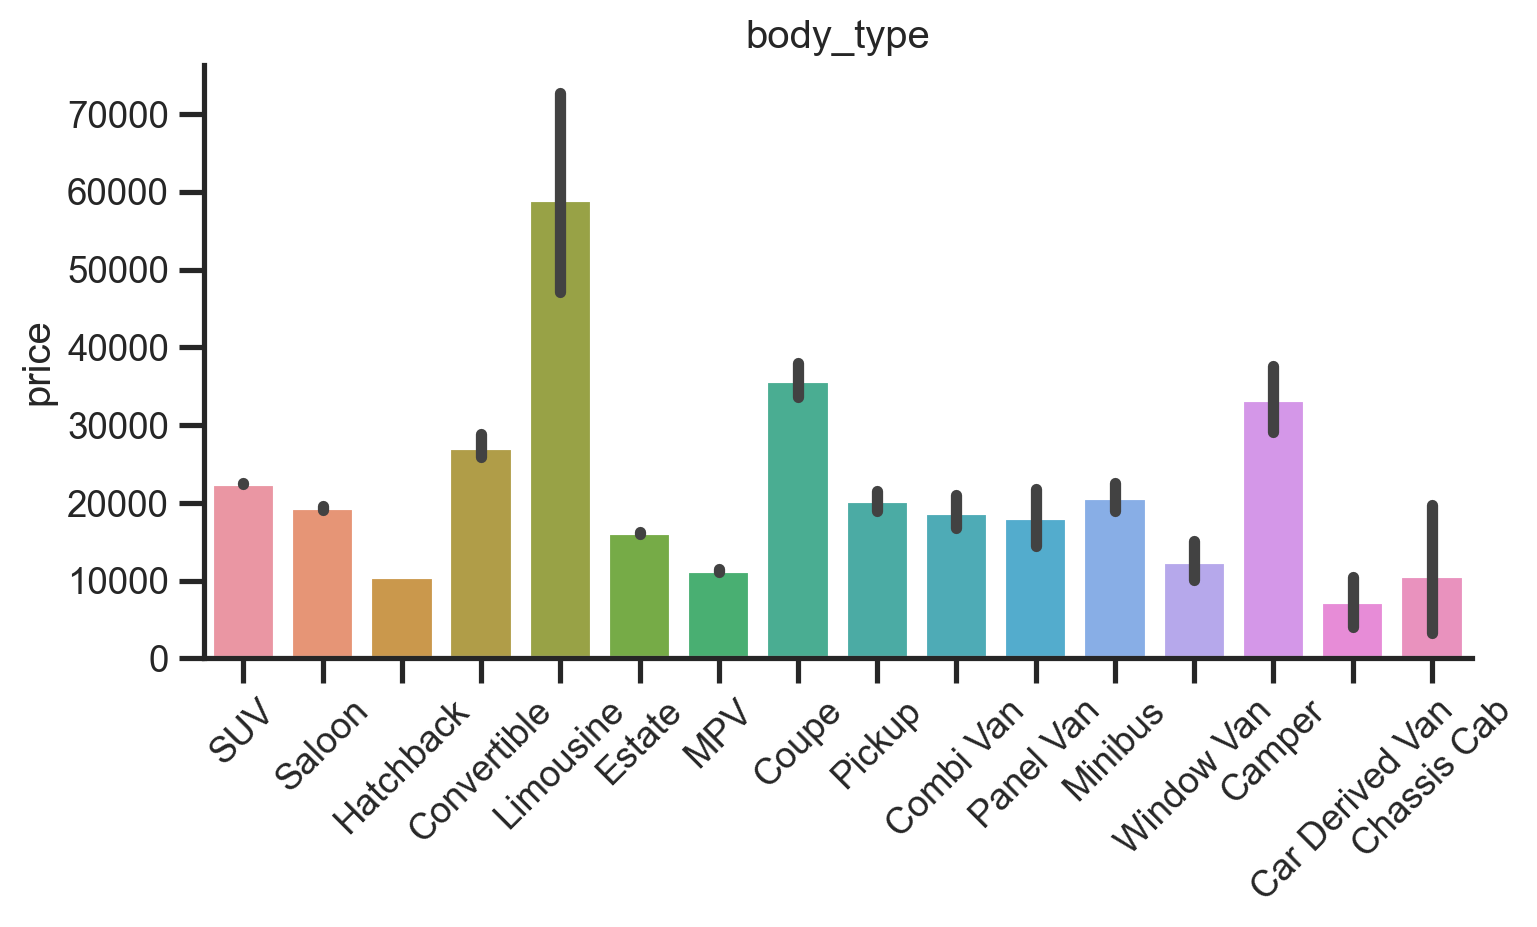

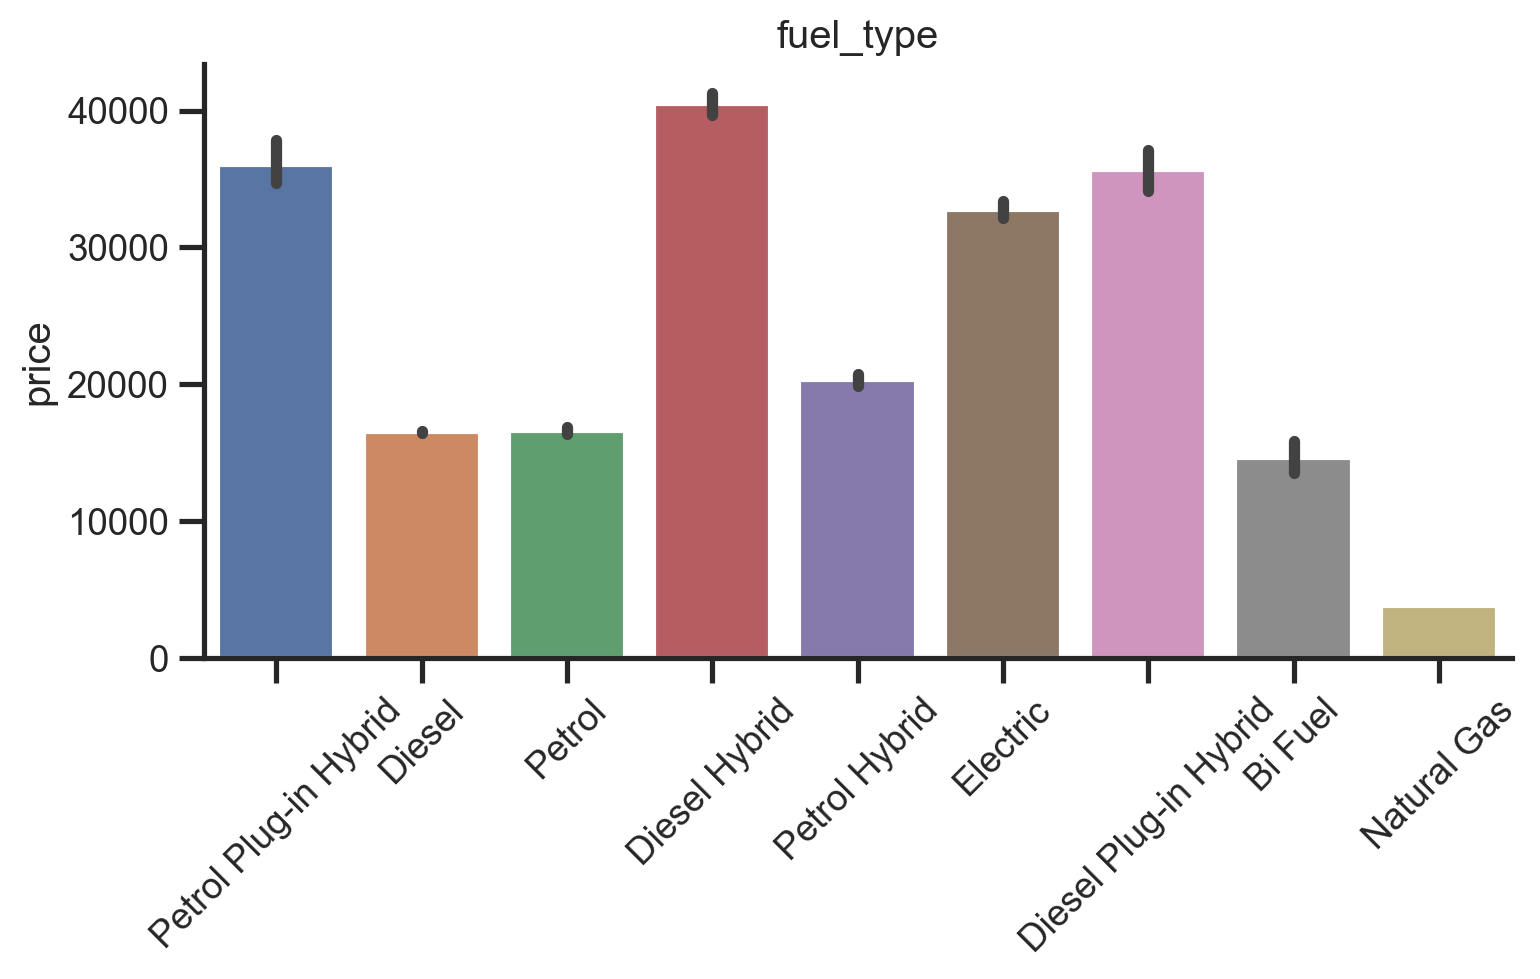

In [22]:
for col in autotrader_some_cat:
    sns.catplot(x=col, y="price", data=autotrader, kind="bar", height=4, aspect=2).set(xlabel=None)
    plt.title(col)
    plt.xticks(rotation=45)

From the plot above we can see the predictive power of standard_colour,body_type,fuel_type to price.

> ## <span style="color:#a1341c"> 1. Data/Domain Understanding and Exploration</span>
>
>>**1.3. Data Processing for Data Exploration and Visualisation (1-2)**


Data processing for data exploration and visualization refers to the process of preparing, cleaning, and transforming data so that it can be effectively explored and visualized. This will be thouroughly address in the next stage (Data Processing for Maching Learning).

> ## <span style="color:#a1341c"> 2. Data Processing for Machine Learning</span>
>
>>**2.1. Dealing with Missing Values, Outliers, and Noise**


In [23]:
autotrader.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
log_price                    0
dtype: int64

From above it shows that we have 7 from the 12 columns that has NaN(Missing Values), The columns are:
- **mileage** have **127** missing value.  
- **reg_code** have **31857** missing value.  
- **standard_colour** have **5378** missing value.  
- **year_of_registration** have **33311** missing value.  
- **body_type** have **837** missing value.  
- **fuel_type** have **601** missing value.  


**We can also see the column with the missing value from the heatmap shown below:**

<Axes: >

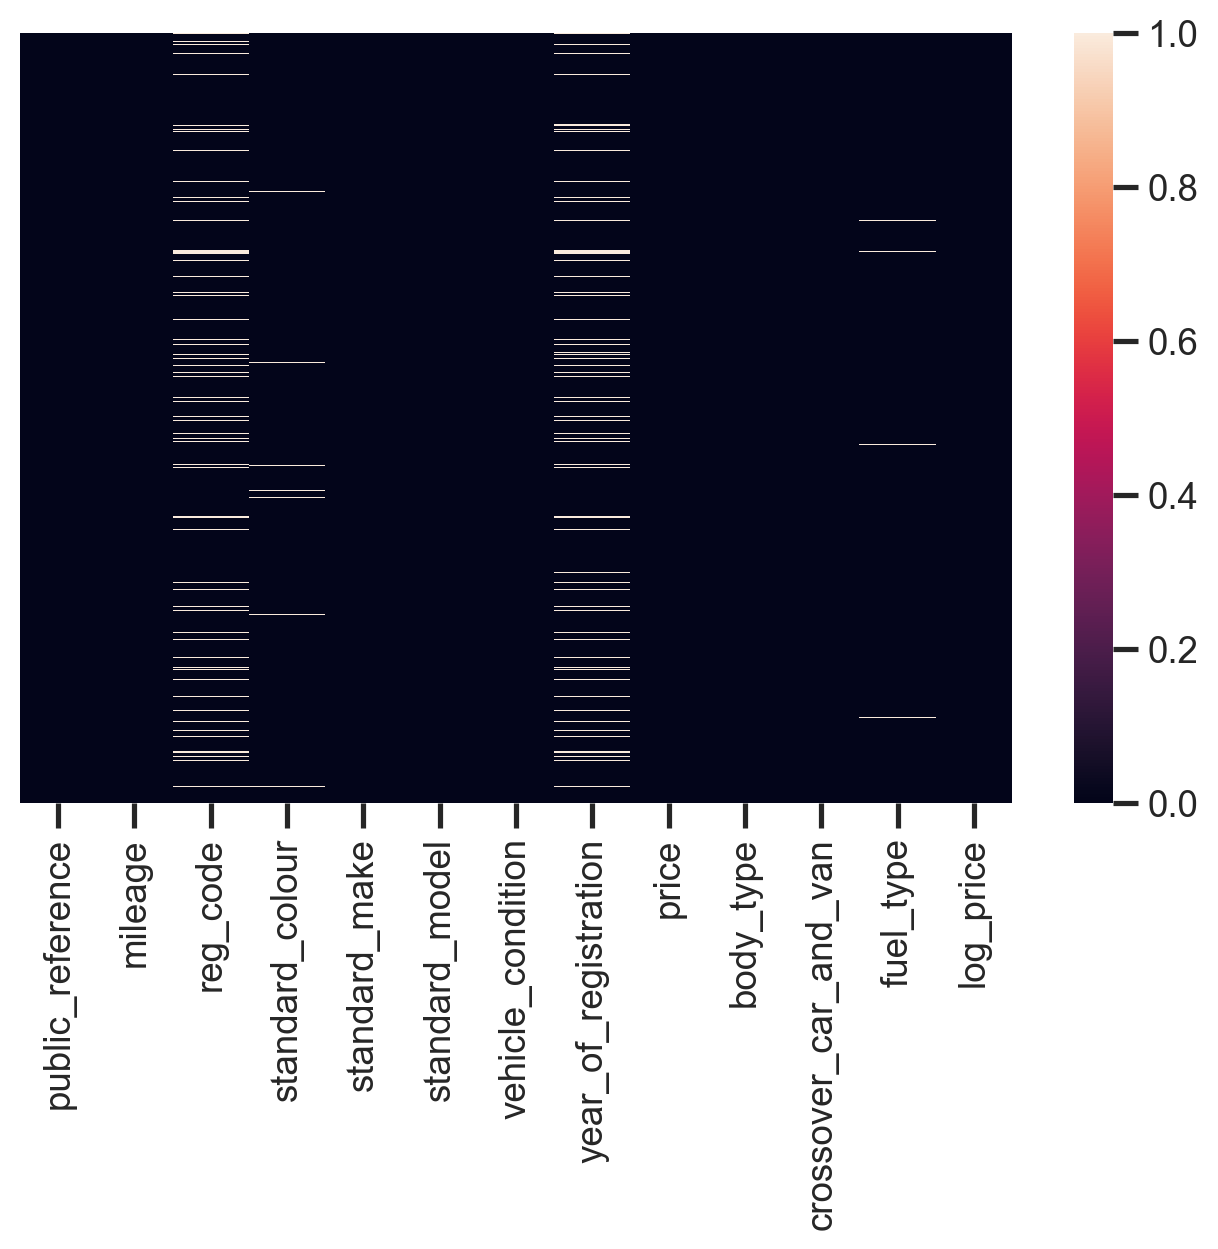

In [24]:
sns.heatmap(autotrader.isna(),yticklabels=False)

There are different ways to determine the noise or outliers, In this case I will check the unique values of each column and check the once that does not represent the majority of each column.

#### Noise/Outliers in year_of_registration

In [25]:
autotrader['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

The **Year_of_registeration** shows some Noise, The following are seen not to be a year, it is observed that they mis typed the year, for instance 1006.0 should be 2006.0 and so on.

999.0,
 1006.0,
 1007.0,
 1008.0,
 1009.0,
 1010.0,
 1015.0,
 1016.0,
 1017.0,
 1018.0,
 1063.0,
 1515.0,
 1909.0,

#### Noise/Outliers in reg_code


In [26]:
autotrader['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

We will be able to know the noise on reg_code giving the link for all UK vehicle reg code with the wikipedia link:
https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom

It is derived from the link that year of registeration of any vehicle is categorised into 2 registeration code depending on the month of the year the car is been registered. March to August will always have reg_code of same present year e.g vehicle registered in year 2018 will have reg_code of 18, while vehicle of same year of registeration but registered between September till February the following year will have 68 which mean 50 was added to the suppose reg_code, The alphabet also represent certain years. With this information at hand we can deduce the noise from the reg_code

The **reg_code** shows some Noise, The observed outlier are **723xuu,94,85,95,38,37 and CA**  
>- 723xuu is clearly a noise.  
>- 94, 85 and 95 are noise because they are 2044, 2035 and 2045 repectively considering the wikipedia link, we are not yet in those years.  
>- 38,37 are also noise because they should be year 2038 and 2037 respectively and we are not yet in those years.

As it has been stated above, we have 7 columns with missing value, we will have to deal with them which will be shown below:

#### Filling missing value for reg_code

In [27]:
autotrader[autotrader['vehicle_condition']=='NEW'].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0      NaN            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  
0                  False  Petrol Plug-in Hybrid  11.211415

I observed that when the vehicle_condition is NEW, we have 31,249 NaN out of the 31,857 for reg_code that are NaN. This mean the vehicle are not yet registered, I checked the data to see if there are NEW cars that has reg_code but there is none. This makes it difficut to choose a value for it. It is reasonable to fill with 0 to show that they are not registered.

In [28]:
autotrader.loc[autotrader['vehicle_condition']=='NEW','reg_code'] = 0

To view if NEW vehicle has been filled with the given value 0 for reg_code.

In [29]:
autotrader[autotrader['vehicle_condition']=='NEW'].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0        0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  
0                  False  Petrol Plug-in Hybrid  11.211415

We can clearly see that the row with public_reference number of 202006039777689 now has reg_code of 0

In [30]:
autotrader['reg_code'].isna().sum()

608

We still have 608 rows of reg_code that are still missing which mean the vehicle_condition of those are USED, We will further find a way to fill those with corresponding year_of_registeration that are not missing.

#### Filling missing value for year_of_registeration

In [31]:
autotrader[autotrader['vehicle_condition']=='NEW'].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0        0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  
0                  False  Petrol Plug-in Hybrid  11.211415

Same observation as with reg_code, when vehicle_condition is NEW, we have 31,249 NaN out of the 33,311 year_of_registeration that are NaN. After doing some rough work, I will fill the year_of registeration with current year. It mean the vehicle is NEW and has not been registered. This will also confirm NEW vehicle as reg_code 0 and year_of_registeration as any present year.

In [32]:
autotrader.loc[autotrader['vehicle_condition']=='NEW','year_of_registration'] = datetime.datetime.now().year

To view if the NEW vehicle have been filled with the given value of current year for our year_of_registeration, We are presently in 2023 which mean we should see 2023.

In [33]:
autotrader[autotrader['vehicle_condition']=='NEW'].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0        0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                2023.0  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  
0                  False  Petrol Plug-in Hybrid  11.211415

As we can see the first column has been filled with 2023

In [34]:
autotrader['year_of_registration'].isna().sum()

2062

We still have 2062 rows of year_of_registeration that are missing, which mean the vehicle_condition of those are USED, We will further find a way to fill those with corresponding reg_code that are not missing.

#### Filling both reg_code and year_of_registeration for USED cars

Now We will have to fill reg_code and year_of_registeration with each other, which mean we will fill year_of_registeration with its corresponding reg_code that is not missing and vise versa.

There are some year_of_registeration and reg_code that are both missing and there is no way those can be filled, so its best we drop those once.

In [35]:
regnanYearnan=autotrader[(autotrader['reg_code'].isna())& 
                         (autotrader['year_of_registration'].isna())].index
autotrader.drop(regnanYearnan,inplace=True)

#### Filling reg_code with corresponding year_of_registeration

In [36]:
regCodeNaN = autotrader[(autotrader['reg_code'].isna()) & 
    (autotrader['year_of_registration'].notna())]
regCodeNaN['year_of_registration'].unique()

array([2019., 2006., 2004., 2017., 2018., 2020., 2005., 1962., 2015.,
       2007., 2010., 2009., 2000., 2013., 1933., 1998., 2012., 1961.,
       2008., 1997., 2016., 1957., 2002., 1999., 2014., 1988., 1954.,
       1955., 1963., 2011., 1960., 1956., 2003., 1959., 1990., 1992.,
       1958., 1950., 1966., 1994., 1973., 1987., 1964., 1995., 1952.,
       2001., 1991.])

In [37]:
regCodeNaN.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
630   202010275479166  54000.0      NaN           White        Toyota   

    standard_model vehicle_condition  year_of_registration  price body_type  \
630         Prius+              USED                2019.0  10900       MPV   

     crossover_car_and_van      fuel_type  log_price  
630                  False  Petrol Hybrid   9.296518

The year_of_registeration of the above is 2019.0 which mean it is expected to fill the correspoinding reg_code with 19 but I am doing this for year_of_registeration that are 2001 and above, this is so because those are the once that can be filled easily considering the wikipedia UK car registeration dataset. 

In [38]:
for index in regCodeNaN.index:
	year_of_registration = int(regCodeNaN.loc[[index], "year_of_registration"])
	if year_of_registration >= 2001:
		#Fill with the last two digits in the year
		autotrader.loc[index, ["reg_code"]] = str(year_of_registration)[2:]

In [39]:
autotrader[(autotrader['reg_code'].isna()) & 
           (autotrader['year_of_registration'] >= 2001)]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type, log_price]
Index: []

In [40]:
autotrader['reg_code'].isna().sum()

78

The above are the reg_code that the year_of_Registeration are less than 2001, They are 78 and I will drop them. We can also get to fill them but I prefer to drop them since they are minimal.

In [41]:
regnan=autotrader[(autotrader['reg_code'].isna())& 
                  (autotrader['year_of_registration'].notna())].index

In [42]:
autotrader.drop(regnan,inplace=True)

In [43]:
autotrader['reg_code'].isna().sum()

0

We have finally filled all the reg_code.

#### Filling year_of_registeration with corresponding reg_code

To fill the year of registeration I will have to drop the following:

>- Reg_code with noise (Just 9 of them).
>- Reg_code with alphabet that has year_of_registeration as NAN(less than 30 of them).

I am doing this because I only want to fill those that has reg_code with numbers, Also it is reasonable to drop those because they are few and droping them will not affect my dataset negatively. It can also be filled but this will take time because I will have to code for each alphabet.
 

In [44]:
autotrader[autotrader['reg_code'].isin(['94', '85', 'CA',  '723xuu', '95', '38',  '37'])].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
9940   202010225293464  32001.0       94          Orange       Renault   

     standard_model vehicle_condition  year_of_registration  price body_type  \
9940         Captur              USED                   NaN   7400       SUV   

      crossover_car_and_van fuel_type  log_price  
9940                  False    Petrol   8.909235

In [45]:
noise=autotrader[autotrader['reg_code'].isin(['94', '85', 'CA',  '723xuu', '95', '38',  '37'])].index
autotrader.drop(noise , inplace=True)

In [46]:
#Observing the reg_code with alphabet and year_of_registeration that us not missint.
autotrader[
         (autotrader['reg_code'].isin(['B', 'P', 'E','R', 'L', 'C', 'Y','M', 'J', 'H','S','N', 'F', 'T', 'V','G', 'D', 'A']))&
         (autotrader['year_of_registration'].isna())
].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
10044   202003098187902  73330.0        B            Gold        Jaguar   

      standard_model vehicle_condition  year_of_registration  price body_type  \
10044        Mark II              USED                   NaN  24990    Saloon   

       crossover_car_and_van fuel_type  log_price  
10044                  False    Petrol  10.126231

In [47]:
#Giving the above code a variable name Regcodeaphabet and I will drop those rows.
Regcodeaphabet=autotrader[
         (autotrader['reg_code'].isin(['B', 'P', 'E','R', 'L', 'C', 'Y','M', 'J', 'H','S','N', 'F', 'T', 'V','G', 'D', 'A']))&
         (autotrader['year_of_registration'].isna())
].index
autotrader.drop(Regcodeaphabet, inplace=True)

In [48]:
#I finally have a clean reg_code and year_of_registeration that are clean.
yearORegNaNnew = autotrader[
    (autotrader['year_of_registration'].isna()) & 
    (~autotrader['reg_code'].isna())
]
yearORegNaNnew['reg_code'].unique()

array(['18', '61', '66', '17', '68', '70', '55', '67', '65', '69', '62',
       '20', '15', '56', '14', '16', '19', '64', '59', '60', '63', '12',
       '51', '13', '54', '09', '10', '04', '11', '08', '07', '06', '57',
       '58', '05', '03', '52', '02', '53'], dtype=object)

In [49]:
for index in yearORegNaNnew.index:
    reg_code = yearORegNaNnew.loc[[index], "reg_code"].tolist()[0]
    if int(yearORegNaNnew.loc[[index], "reg_code"]) > 50:
        # Subtract 50 from reg_code if it's greater than 50 and add 2000
        autotrader.loc[[index], "year_of_registration"] = 2000 + (int(reg_code) - 50)
    else:
        # Add 2000 to reg_code if it's less than 50
        autotrader.loc[[index], "year_of_registration"] = 2000 + int(reg_code)

In [50]:
autotrader['year_of_registration'].isna().sum()

0

We have finally filled all the year_of_registeration.

**Now I want to check if we still have the noise for both reg_code and year_of_registeration, If available we will replace them with the right one.**

In [51]:
autotrader['reg_code'].unique()

array([0, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', 'm', 'FW', 's', 'k', '01', 'p'], dtype=object)

'94', '85', 'CA',  '723xuu', '95', '38',  '37', This were our noise in reg_code, we dropped them above and they are no longer showing.

In [52]:
autotrader['year_of_registration'].unique()

array([2023., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1967., 1972.,
       1982., 1968., 1979., 1964., 1981., 1985., 1978., 1971., 1974.,
       1966., 1977., 1965., 1007., 1515., 1963., 1063., 1975., 1961.,
       1009., 1016., 1909., 1934., 1010., 1008., 1018.,  999., 1962.,
       1017., 1952., 1006., 1015., 1957., 1954.])

999.0, 1006.0, 1007.0, 1008.0, 1009.0, 1010.0, 1015.0, 1016.0, 1017.0, 1018.0, 1063.0, 1515.0, 1909.0, This were the noise we found in the year_of_registeration, as we can see we still have them in our data so we will have to replace them. We will replace them with 1999.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2015.0, 2016.0, 2017.0, 2018.0, 2003.0, 2015.0, 2009.0


In [53]:
#Replacing the noise above with its corresponding correct once
autotrader['year_of_registration'].replace(
    {999.0:1999.0, 1006.0:2006.0, 1007.0:2007.0, 1008.0:2008.0, 1009.0:2009.0, 1010.0:2010.0, 1015.0:2015.0, 1016.0:2016.0, 1017.0:2017.0, 1018.0:2018.0, 1063.0:2003.0, 1515.0:2015.0, 1909.0:2009.0},inplace=True
)

In [54]:
autotrader['year_of_registration'].unique()

array([2023., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1967., 1972.,
       1982., 1968., 1979., 1964., 1981., 1985., 1978., 1971., 1974.,
       1966., 1977., 1965., 1963., 1975., 1961., 1934., 1962., 1952.,
       1957., 1954.])

The noise in the year_of_registeration are no more.

In [55]:
autotrader.isna().sum()

public_reference            0
mileage                   112
reg_code                    0
standard_colour          5344
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                 760
crossover_car_and_van       0
fuel_type                 587
log_price                   0
dtype: int64

In [56]:
autotrader.shape

(401549, 13)

At this point we have only drop limited amount of rows, We have 402005 from the start and now we have 401549 rows.

#### Filling missing value in mileage

We will fill the mileage by grouping the vehicle with their corresponding year_of_registeration and fill with each mean. For example, all vehicle with year_of_registeration 2012 with missing mileage will be filled with the mean of vehicle registered in year 2012 

In [57]:
autotrader['mileage']=autotrader.groupby('year_of_registration', group_keys=False)['mileage'].apply(lambda x:x.fillna(x.mean()))

In [58]:
autotrader['mileage'].isna().sum()

0

We have our mileage also finally filled

#### Filling missing value for standard_colour

In [59]:
autotrader['standard_colour'].isna().sum()

5344

From the above we have 5344 Nan Standard_colour, There are 2 columns that are correlated to it,also with my domain knowledge I think its right to group colour by standard_model and standard_make and fill the mode of colour.

In [60]:
autotrader['standard_colour'] = autotrader.groupby(['standard_make', 'standard_model'], group_keys=False)['standard_colour'].apply(lambda x: x.fillna(stats.mode(x)[0][0]))


In [61]:
autotrader['standard_colour'].unique()

array(['Grey', 'Blue', 'Brown', 'Red', 'Bronze', 'Black', 'White',
       'Silver', 'Purple', 'Green', 'Orange', 'Yellow', 'Turquoise',
       'Gold', 'Multicolour', 'Beige', 'Burgundy', 'Pink', 'Maroon',
       'Magenta', 0, 'Navy', 'Indigo'], dtype=object)

After groupby and checking the unique value, I found out that there are few of the vehicle that were given color 0, This happened because they are just 1 particular make and model and they do not have any color at all, this will be shown below:

In [62]:
autotrader[autotrader['standard_colour']==0].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
37035   202009203970256    120.0       53               0         Tiger   

      standard_model vehicle_condition  year_of_registration  price body_type  \
37035        Era HSS              USED                2004.0  17995       NaN   

       crossover_car_and_van fuel_type  log_price  
37035                  False       NaN   9.797849

Its either I decide a colour for this once or I drop them, I decided to drop them because they are not much.

In [63]:
autotrader=autotrader[autotrader['standard_colour']!=0]

In [64]:
autotrader['standard_colour'].isna().sum()

0

We have our standard_colour finally filled

#### Filling missing value for fuel_type

In [65]:
autotrader['fuel_type'].isna().sum()

581

We have 581 fuel_type that are missing out of over 400k data, filling the fuel type with mode of fuel_type which is petrol will not have a negative impact on our model.

In [66]:
fuel_type_mode = autotrader['fuel_type'].mode()[0]

In [67]:
autotrader['fuel_type'] =autotrader['fuel_type'].fillna(fuel_type_mode)

In [68]:
autotrader['fuel_type'].isna().sum()

0

We have also filled the fuel_type.

#### Filling missing value for Body_Type.

In [69]:
autotrader['body_type']=autotrader.groupby(['standard_make','standard_model'], group_keys=False)['body_type'].apply(lambda x:x.fillna(stats.mode(x)[0][0]))

In [70]:
autotrader['body_type'].unique()

array(['SUV', 'Saloon', 'Hatchback', 'Convertible', 'Limousine', 'Estate',
       'MPV', 'Coupe', 0, 'Combi Van', 'Pickup', 'Panel Van', 'Minibus',
       'Window Van', 'Camper', 'Car Derived Van', 'Chassis Cab'],
      dtype=object)

After groupby and checking the unique value, I found out that there are few of the vehicle that were given body_type 0, This happened because they do not have a body type for the group of make and model this will be shown below:

In [71]:
no_body_type = autotrader[autotrader['body_type']==0]
no_body_type[['standard_make','standard_model','body_type']].value_counts()

standard_make  standard_model  body_type
Volkswagen     Caddy           0            12
Tiger          Avon            0             2
Austin         A35             0             1
Dax            Tojeiro         0             1
Infiniti       QX56            0             1
Mercedes-Benz  250             0             1
Mev            Exocet          0             1
Mitsubishi     Pajero Mini     0             1
Nissan         NV400           0             1
Subaru         Sambar          0             1
dtype: int64

From the above we have a vehicle that is Volkswagen Caddy that are 12 in numbers, I will fill it. I check google to see what type of body type is it and I found out it is Wagon, I can as well do that for others but because they are 1 or 2 in number, I will drop them.

In [72]:
autotrader.loc[(autotrader['standard_make'] == 'Volkswagen') 
               & (autotrader['standard_model'] == 'Caddy'), 'body_type'] = 'wagon'

In [73]:
autotrader[autotrader['standard_model'] == 'Caddy'].head(1)

public_reference  mileage reg_code standard_colour standard_make  \
307   202010245377951  33287.0       63             Red    Volkswagen   

    standard_model vehicle_condition  year_of_registration  price body_type  \
307          Caddy              USED                2013.0  10990     wagon   

     crossover_car_and_van fuel_type  log_price  
307                  False    Diesel   9.304741

We can confirm that this has also been filled with body_type Wagon. I will now drop the other once.

In [74]:
autotrader=autotrader[autotrader['body_type']!=0]

In [75]:
autotrader[autotrader['body_type'] == 0]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type, log_price]
Index: []

In [76]:
autotrader['body_type'].isna().sum()

0

We have finally filled and clean the body_type.

#### Removing Noise/Outlier from Mileage

In [77]:
max_threshold  = autotrader['mileage'].quantile(0.999)
max_threshold 

196050.48600000003

I am setting my quantile to 0.9999, due to my domain knowledge about cars, any car above 196050.48600000003 mileage is said to be an outlier and from the data we can confirm as those figures above this does not represent the majority of the mileage data.

In [78]:
autotrader = autotrader[autotrader['mileage'] < max_threshold]

In [79]:
autotrader[autotrader['mileage']>137975.95000000007]

public_reference   mileage reg_code standard_colour  standard_make  \
32       201905097776109  180000.0       64           White          SKODA   
86       202008262951083  158900.0       03            Grey          Honda   
165      202009244172272  143000.0       58             Red     Land Rover   
187      202009304395201  151580.0       08           Black           Audi   
215      202010064666013  150000.0       56          Silver           Audi   
...                  ...       ...      ...             ...            ...   
401356   202007101089346  189000.0       03           Green        Citroen   
401663   202010285534592  180000.0       08            Grey         Nissan   
401680   202010305619455  149000.0       05             Red     Land Rover   
401703   202001176279592  160000.0       64           White  Mercedes-Benz   
401866   202010054615465  139567.0       64           Beige          SKODA   

       standard_model vehicle_condition  year_of_registration  price  \
32            Octavia              USED                2014.0   3989   
86             Accord              USED                2003.0   1395   
165      Freelander 2              USED                2008.0   3390   
187                TT              USED                2008.0   3490   
215                A4              USED                2006.0   1100   
...               ...               ...                   ...    ...   
401356  Xsara Picasso              USED                2003.0    695   
401663        Qashqai              USED                2008.0    750   
401680   Defender 110              USED                2005.0  15500   
401703        C Class              USED                2014.0   9391   
401866        Octavia              USED                2014.0   3995   

        body_type  crossover_car_and_van fuel_type  log_price  
32      Hatchback                  False    Diesel   8.291296  
86         Estate                  False    Petrol   7.240650  
165           SUV                  False    Diesel   8.128585  
187         Coupe                  False    Petrol   8.157657  
215        Saloon                  False    Diesel   7.003065  
...           ...                    ...       ...        ...  
401356        MPV                  False    Diesel   6.543912  
401663  Hatchback                  False    Diesel   6.620073  
401680        SUV                  False    Diesel   9.648595  
401703     Estate                  False    Diesel   9.147507  
401866  Hatchback                  False    Diesel   8.292799  

[4582 rows x 13 columns]

We have taken any mileage above 196050.48600000003 from our dataset.

<Axes: xlabel='mileage'>

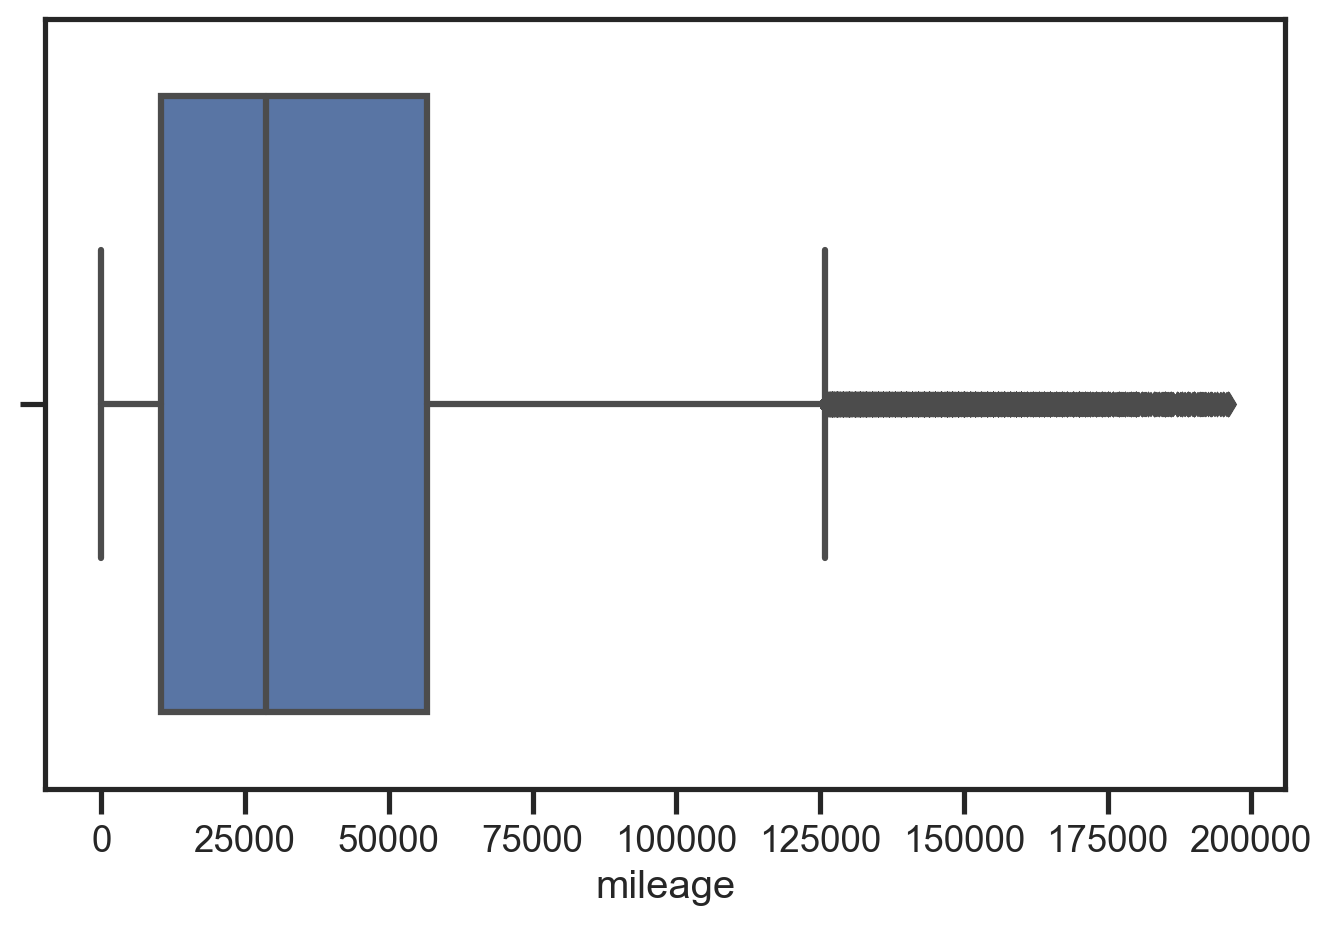

In [80]:
sns.boxplot(x="mileage",data=autotrader)

The box plot above shows we have reduced/removed our outliers from the mileage, this is so because there are no point outside the whisker.

#### Removing Noise/Outlier from Price

In [81]:
max_threshold  = autotrader['price'].quantile(0.999)
max_threshold 

234737.04000002937

I am setting my quantile to 0.9999, due to my domain knowledge about cars, any car above 234737.04000002937 pounds  is said to be an outlier and from the data we can confirm as those figures above this does not represent the majority of the mileage data.

In [82]:
autotrader = autotrader[autotrader['price'] < max_threshold]

In [83]:
autotrader[autotrader['price']>154950.0]

public_reference  mileage reg_code standard_colour standard_make  \
973      202010305621543  10300.0       16            Grey       Ferrari   
1004     202006110024693   7253.0       66           Black   Lamborghini   
1694     202007151274501   2900.0       17            Blue       Ferrari   
4775     202006230428220   1000.0       19          Silver       Ferrari   
5096     202001136096243    100.0       69           Black    Land Rover   
...                  ...      ...      ...             ...           ...   
398701   202007231609585  41335.0       51            Blue           BMW   
400171   202009304376276   2169.0       20          Silver       Ferrari   
400647   201806117388258  25000.0       12          Orange   Lamborghini   
400724   202008242879192      0.0        L          Silver       Porsche   
401338   202005309653881   9000.0       19            Grey       Bentley   

           standard_model vehicle_condition  year_of_registration   price  \
973         F12berlinetta              USED                2016.0  164995   
1004            Aventador              USED                2016.0  219995   
1694                  488              USED                2017.0  174995   
4775            GTC4Lusso              USED                2019.0  159000   
5096    Range Rover Sport              USED                2020.0  159950   
...                   ...               ...                   ...     ...   
398701                 Z8              USED                2002.0  164990   
400171          Portofino              USED                2020.0  164000   
400647          Aventador              USED                2012.0  154995   
400724                911              USED                1973.0  175000   
401338        Continental              USED                2019.0  159950   

          body_type  crossover_car_and_van fuel_type  log_price  
973           Coupe                  False    Petrol  12.013670  
1004          Coupe                  False    Petrol  12.301360  
1694    Convertible                  False    Petrol  12.072513  
4775          Coupe                  False    Petrol  11.976659  
5096            SUV                  False    Petrol  11.982617  
...             ...                    ...       ...        ...  
398701  Convertible                  False    Petrol  12.013640  
400171  Convertible                  False    Petrol  12.007622  
400647        Coupe                  False    Petrol  11.951148  
400724        Coupe                  False    Petrol  12.072541  
401338        Coupe                  False    Petrol  11.982617  

[800 rows x 13 columns]

<Axes: xlabel='price'>

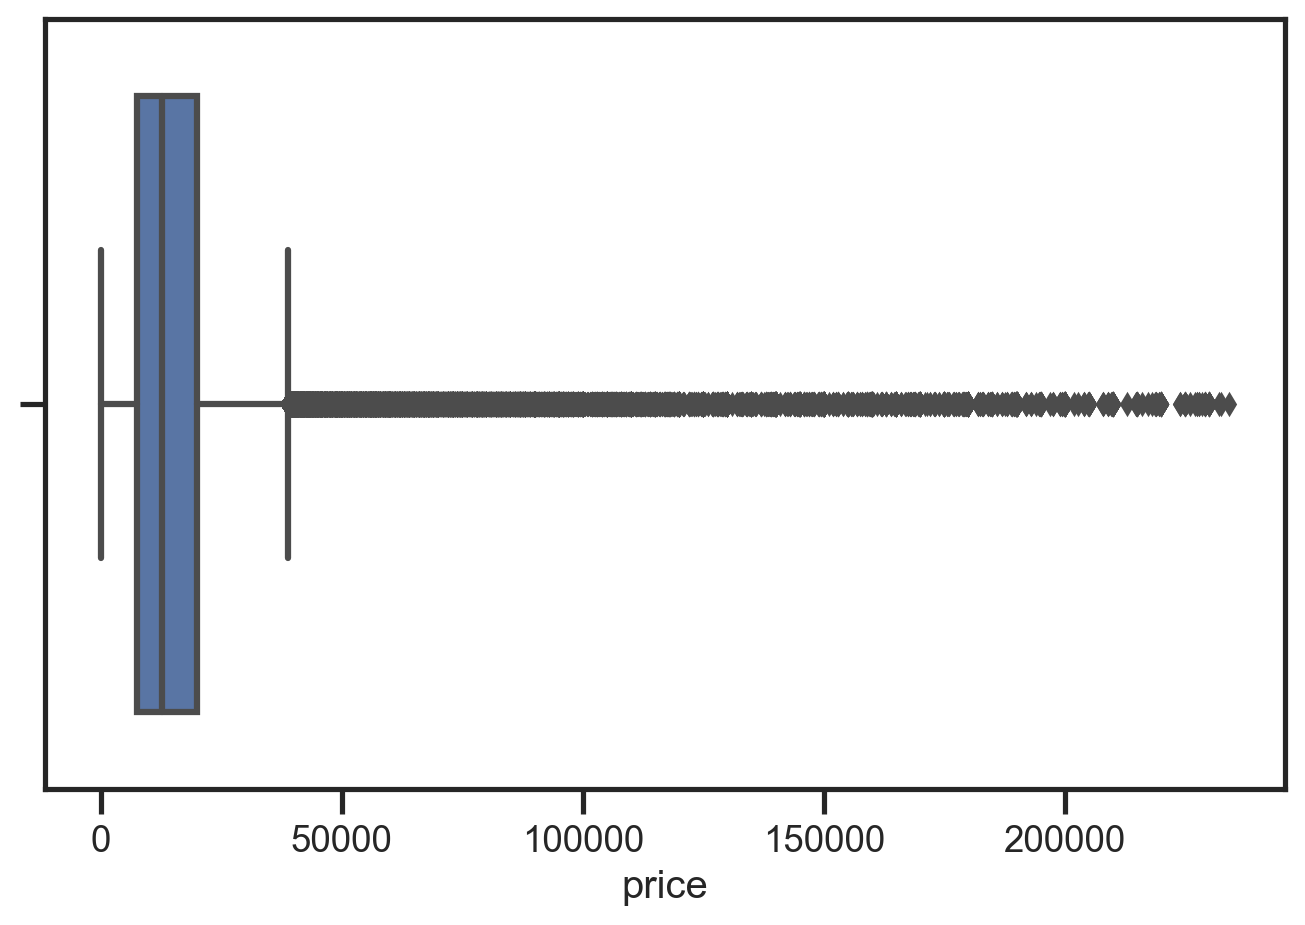

In [84]:
sns.boxplot(x="price",data=autotrader)

The box plot above shows we have reduced/removed our outliers from the price, this is so because there are few points outside the whisker.

In [85]:
autotrader.shape

(400711, 13)

In [86]:
autotrader.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
log_price                0
dtype: int64

We are done filling the missing value and We still have 400711 rows from the original 402005, which mean our sample is still preserved.

#### Visualisation after Data Exploration.

**Plot mileage vs log_price.**

<Axes: xlabel='mileage', ylabel='log_price'>

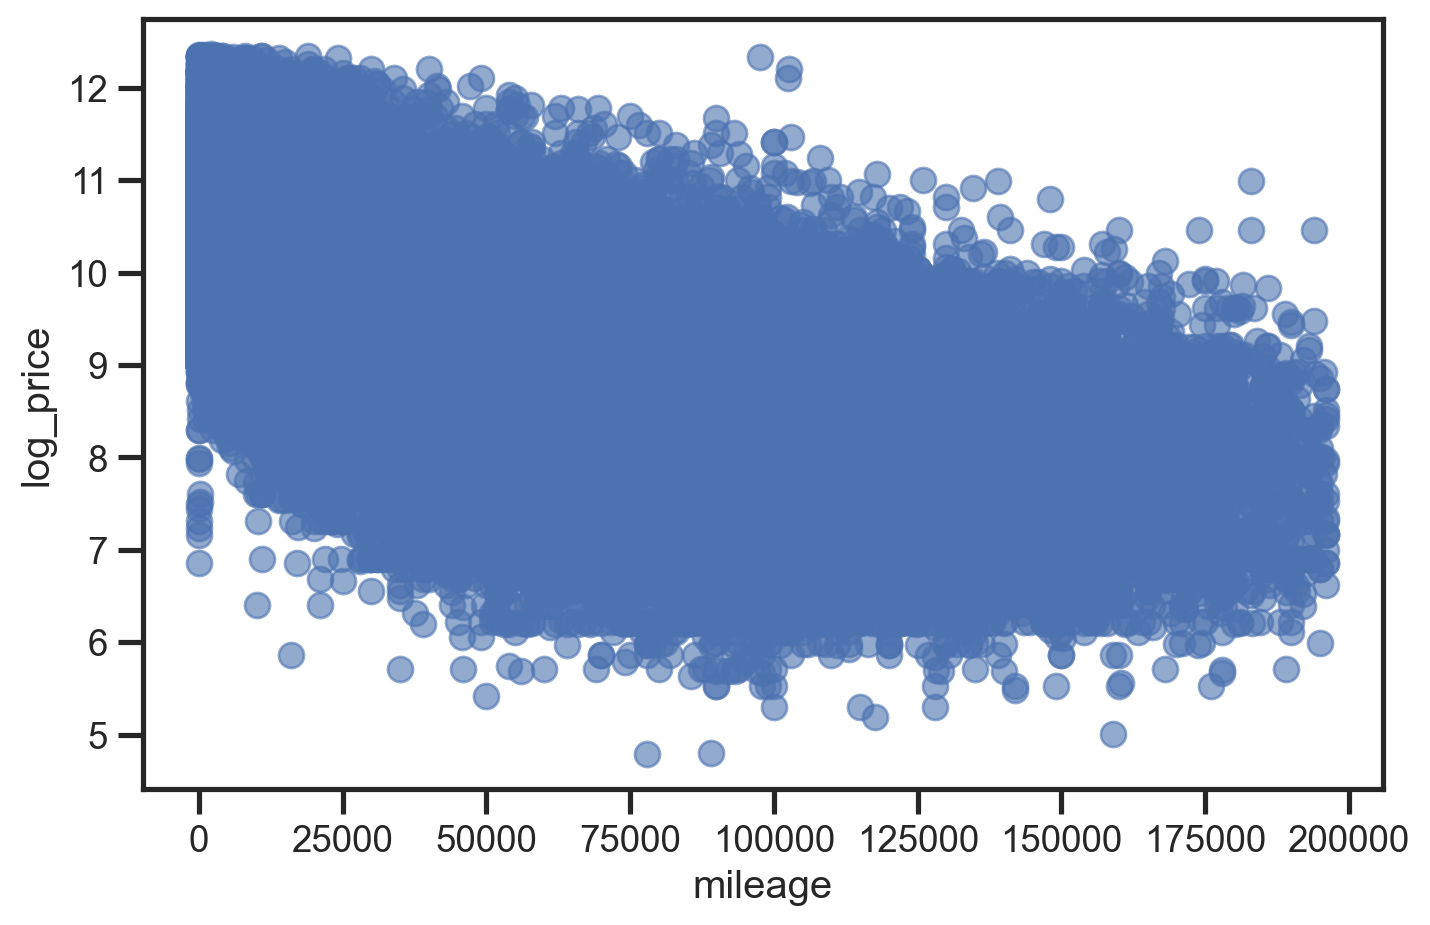

In [87]:
sns.regplot(data=autotrader, x='mileage', y='log_price', scatter_kws={'alpha': 0.6})

It is clear that the higher the mileage the lower the price.

**body_type vs log_price.**

Text(0, 0.5, 'Price in Log')

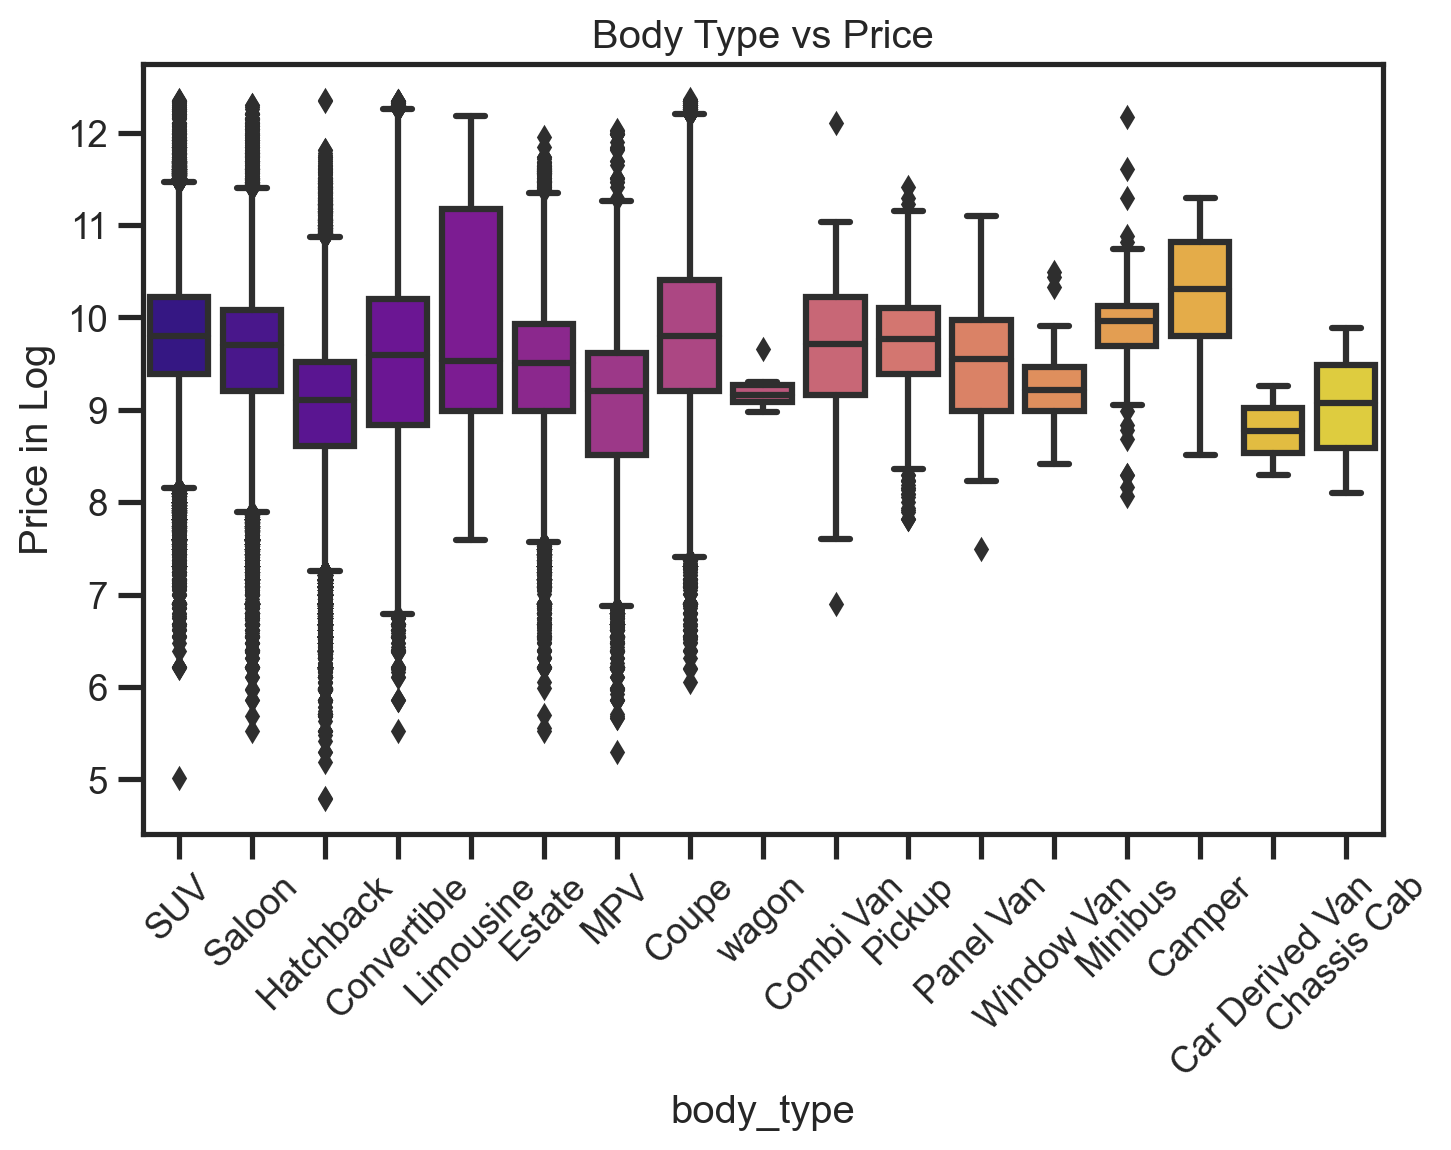

In [88]:
plt.title('Body Type vs Price')
plt.xticks(rotation=45)
sns.boxplot(x=autotrader.body_type, y=autotrader.log_price, palette=("plasma"))
plt.ylabel("Price in Log")

The Body Type SUV have higher price range than the others(though some has some high values outside the whiskers.). Most of the body type has normal distribution except for Limousine and MPV. Limousine,Window Van, Camper, Car Derived Van and Chassis Cab do not have any outlier.

**body_type vs fuel_type.**

<Axes: title={'center': 'Body Type vs Fuel Type'}, xlabel='body_type', ylabel='Count'>

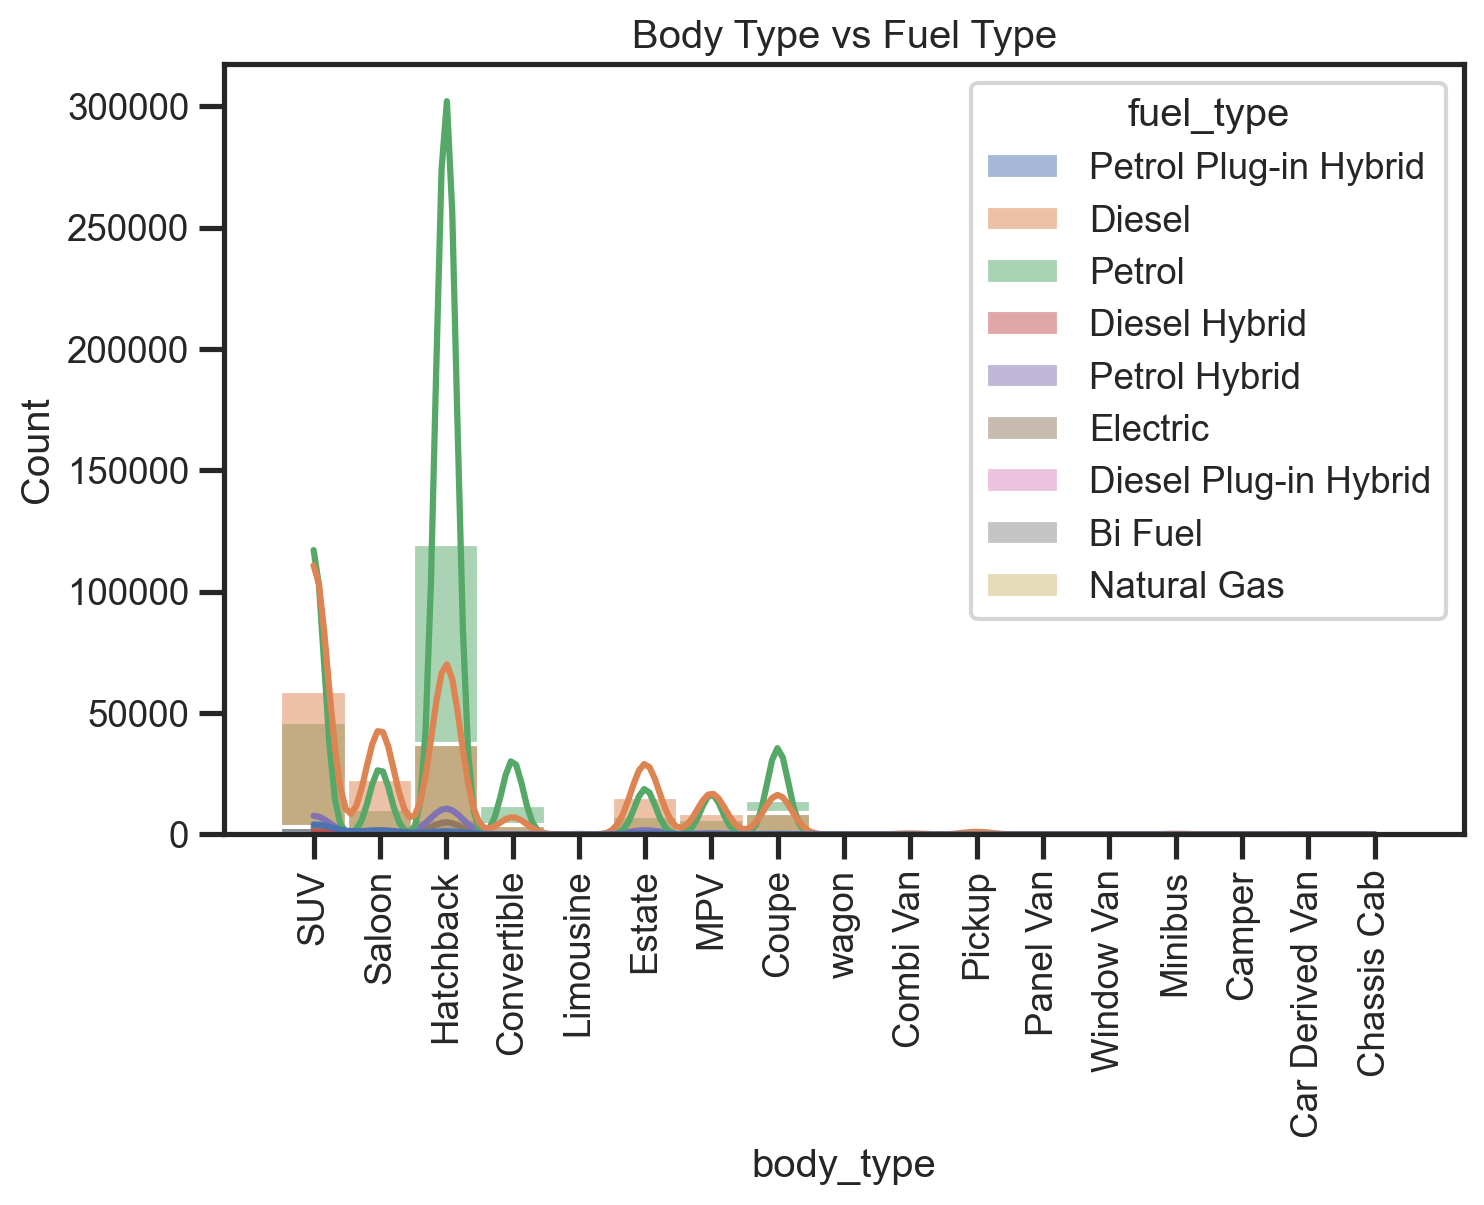

In [89]:
plt.title('Body Type vs Fuel Type')
plt.xticks(rotation=90)
sns.histplot(data=autotrader, x='body_type', kde=True, hue='fuel_type')

We can see that:  
1) SUV has both higher number of diesel and electric than any other type of fuel type.  
2) Hatchback has the highest number of petrol than any other body type and also have some that are electric.  

3) Most of the body type of car seem to have electric fuel type.

> ## <span style="color:#a1341c">2. Data Processing for Machine Learning</span>
>
>> **Feature Engineering, Data Transformations, Feature Selection (2-3)**


#### Feature Engineering

First I will like to know the age of all vehicles, This will be year_of_registeration subtracted from the current_year.

In [90]:
#Creating a new column current_year
autotrader['current_year'] = datetime.datetime.now().year

In [91]:
autotrader.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0        0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                2023.0  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  current_year  
0                  False  Petrol Plug-in Hybrid  11.211415          2023

In [92]:
#Creating a new column called vehicle age.
autotrader['vehicle_age']= autotrader['current_year'] - autotrader['year_of_registration']

In [93]:
autotrader.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0        0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                2023.0  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  current_year  \
0                  False  Petrol Plug-in Hybrid  11.211415          2023   

   vehicle_age  
0          0.0

#### Worthy to NOTE:

Referecing to an jornal online(Used Car Mileage Vs Age – Which Matters More? https://news.motors.co.uk/used-car-mileage-vs-age-which-matters-more)

Calculating the average mileage of a car is tricky. According to government statistics, the average number of miles driven by cars in England each year was 7,400 miles in 2019 (the latest figures are for 2020, but they’re skewed downwards due to pandemic lockdowns so we’ve based the average on 2019 figures as it was a more normal year).

With the above claim I will like to get the average mileage of the vehicle.

In [94]:
autotrader['average_mileage'] = autotrader['vehicle_age'] * 7400

In [95]:
autotrader.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0        0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                2023.0  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  current_year  \
0                  False  Petrol Plug-in Hybrid  11.211415          2023   

   vehicle_age  average_mileage  
0          0.0              0.0

With the average_mileage it will not be a bad idea to categorise our vehicle considering the original mileage versus the average mileage. Say if the original mileage is between 0 to half of the average mileage, the vehicle has Low mileage,if mileage is less than and also greater that half of average mileage categorize as Good mileage, if mileage is 15000 greater than average mileage, categorize as High mileage, else Very High mileage

In [96]:
def categorize_mileage(autotrader):
    mileage = autotrader['mileage']
    average_mileage = autotrader['average_mileage']
    if mileage == 0 or mileage < average_mileage / 2:
        return "Low mileage"
    elif mileage < average_mileage:
        return "Good mileage"
    elif mileage < average_mileage + 15000:
        return "High mileage"
    else:
        return "Very High mileage"

In [97]:
autotrader['mileage_category'] = autotrader.apply(categorize_mileage, axis=1)

In [98]:
autotrader.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0        0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                2023.0  73970       SUV   

   crossover_car_and_van              fuel_type  log_price  current_year  \
0                  False  Petrol Plug-in Hybrid  11.211415          2023   

   vehicle_age  average_mileage mileage_category  
0          0.0              0.0      Low mileage

In [99]:
autotrader.shape

(400711, 17)

The column was originaly 12 but I have added five more features.

In [100]:
autotrader_main = autotrader.copy()

In [101]:
autotrader_main.head(3)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0        0            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                2023.0  73970       SUV   
1             XF              USED                2011.0   7000    Saloon   
2           Yeti              USED                2017.0  14000       SUV   

   crossover_car_and_van              fuel_type  log_price  current_year  \
0                  False  Petrol Plug-in Hybrid  11.211415          2023   
1                  False                 Diesel   8.853665          2023   
2                  False                 Petrol   9.546813          2023   

   vehicle_age  average_mileage   mileage_category  
0          0.0              0.0        Low mileage  
1         12.0          88800.0  Very High mileage  
2          6.0          44400.0        Low mileage

In [102]:
autotrader.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400711 entries, 0 to 402004
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       400711 non-null  int64  
 1   mileage                400711 non-null  float64
 2   reg_code               400711 non-null  object 
 3   standard_colour        400711 non-null  object 
 4   standard_make          400711 non-null  object 
 5   standard_model         400711 non-null  object 
 6   vehicle_condition      400711 non-null  object 
 7   year_of_registration   400711 non-null  float64
 8   price                  400711 non-null  int64  
 9   body_type              400711 non-null  object 
 10  crossover_car_and_van  400711 non-null  bool   
 11  fuel_type              400711 non-null  object 
 12  log_price              400711 non-null  float64
 13  current_year           400711 non-null  int64  
 14  vehicle_age            400711 non-nu

### DATA TRANSFROMATION

#### 20% Sample taken

In [103]:
#Taking 20% sample of all data
autotrader_sampled = autotrader.sample(frac=0.20, random_state=82)

In [104]:
autotrader_model = autotrader_sampled.copy()

In [105]:
autotrader_explain = autotrader_model.copy()

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from functools import partial
rmse = partial(mean_squared_error, squared=False)


import warnings
warnings.filterwarnings("ignore")


### AUTOMATED FEATURE SELECTION USING SelectKBest

In [107]:
autotrader_sampled.head()

public_reference  mileage reg_code standard_colour  standard_make  \
345286   202007070940379   8223.0       19             Red        Renault   
283654   202008122387805  41000.0       13             Red         Suzuki   
308679   202010044573837  90000.0       06          Silver         Toyota   
348507   202010165088135  31017.0       65           Black  Mercedes-Benz   
54115    202009043300677  29599.0       16             Red            BMW   

       standard_model vehicle_condition  year_of_registration  price  \
345286         Kadjar              USED                2019.0  16000   
283654          Swift              USED                2013.0   4895   
308679          Yaris              USED                2006.0   1790   
348507        C Class              USED                2015.0  17000   
54115        3 Series              USED                2016.0  18417   

        body_type  crossover_car_and_van fuel_type  log_price  current_year  \
345286        SUV                  False    Petrol   9.680344          2023   
283654  Hatchback                  False    Petrol   8.495970          2023   
308679  Hatchback                  False    Petrol   7.489971          2023   
348507     Saloon                  False    Petrol   9.740969          2023   
54115      Saloon                  False    Diesel   9.821029          2023   

        vehicle_age  average_mileage mileage_category  
345286          4.0          29600.0      Low mileage  
283654         10.0          74000.0     Good mileage  
308679         17.0         125800.0     Good mileage  
348507          8.0          59200.0     Good mileage  
54115           7.0          51800.0     Good mileage

In [108]:
autotrader_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80142 entries, 345286 to 126056
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       80142 non-null  int64  
 1   mileage                80142 non-null  float64
 2   reg_code               80142 non-null  object 
 3   standard_colour        80142 non-null  object 
 4   standard_make          80142 non-null  object 
 5   standard_model         80142 non-null  object 
 6   vehicle_condition      80142 non-null  object 
 7   year_of_registration   80142 non-null  float64
 8   price                  80142 non-null  int64  
 9   body_type              80142 non-null  object 
 10  crossover_car_and_van  80142 non-null  bool   
 11  fuel_type              80142 non-null  object 
 12  log_price              80142 non-null  float64
 13  current_year           80142 non-null  int64  
 14  vehicle_age            80142 non-null  float64
 

In [109]:
autotrader_sampled = autotrader_sampled.drop(columns=['public_reference', 'reg_code','log_price','current_year' ])

In [110]:
X, y = autotrader_sampled.drop(columns='price'), autotrader_sampled['price']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [112]:
numeric_features = X.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(
    steps=[
        #("imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')

In [113]:
from category_encoders import TargetEncoder

categorical_features = X.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(
    steps=[        #("imputer", SimpleImputer(strategy="most_frequent")),         
                    ("te", TargetEncoder()),    ]
).set_output(transform='pandas')

In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [115]:
preprocessor.fit(X, y)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['mileage', 'year_of_registration',
                                  'crossover_car_and_van', 'vehicle_age',
                                  'average_mileage']),
                                ('cat',
                                 Pipeline(steps=[('te', TargetEncoder())]),
                                 ['standard_colour', 'standard_make',
                                  'standard_model', 'vehicle_condition',
                                  'body_type', 'fuel_type',
                                  'mileage_category'])],
                  verbose_feature_names_out=False)

In [116]:
X_transformed = preprocessor.transform(X)

In [117]:
X_transformed.head(3)

mileage  year_of_registration  crossover_car_and_van  vehicle_age  \
345286 -0.866278              0.721035              -0.066892    -0.721035   
283654  0.098926             -0.578603              -0.066892     0.578603   
308679  1.541859             -2.094848              -0.066892     2.094848   

        average_mileage  standard_colour  standard_make  standard_model  \
345286        -0.721035     13867.165288   10734.475881    13788.521472   
283654         0.578603     13867.165288    9345.955024     7749.854671   
308679         2.094848     13007.271356   11288.023086     9039.437363   

        vehicle_condition     body_type     fuel_type  mileage_category  
345286       15242.317932  22346.710658  15406.717999      21804.880552  
283654       15242.317932  10446.658218  15406.717999      11944.842005  
308679       15242.317932  10446.658218  15406.717999      11944.842005

Selecting k best.  
Plotting negative mean squared error versus the range of k values.    
The lowest point on the curve indicates the best k value.

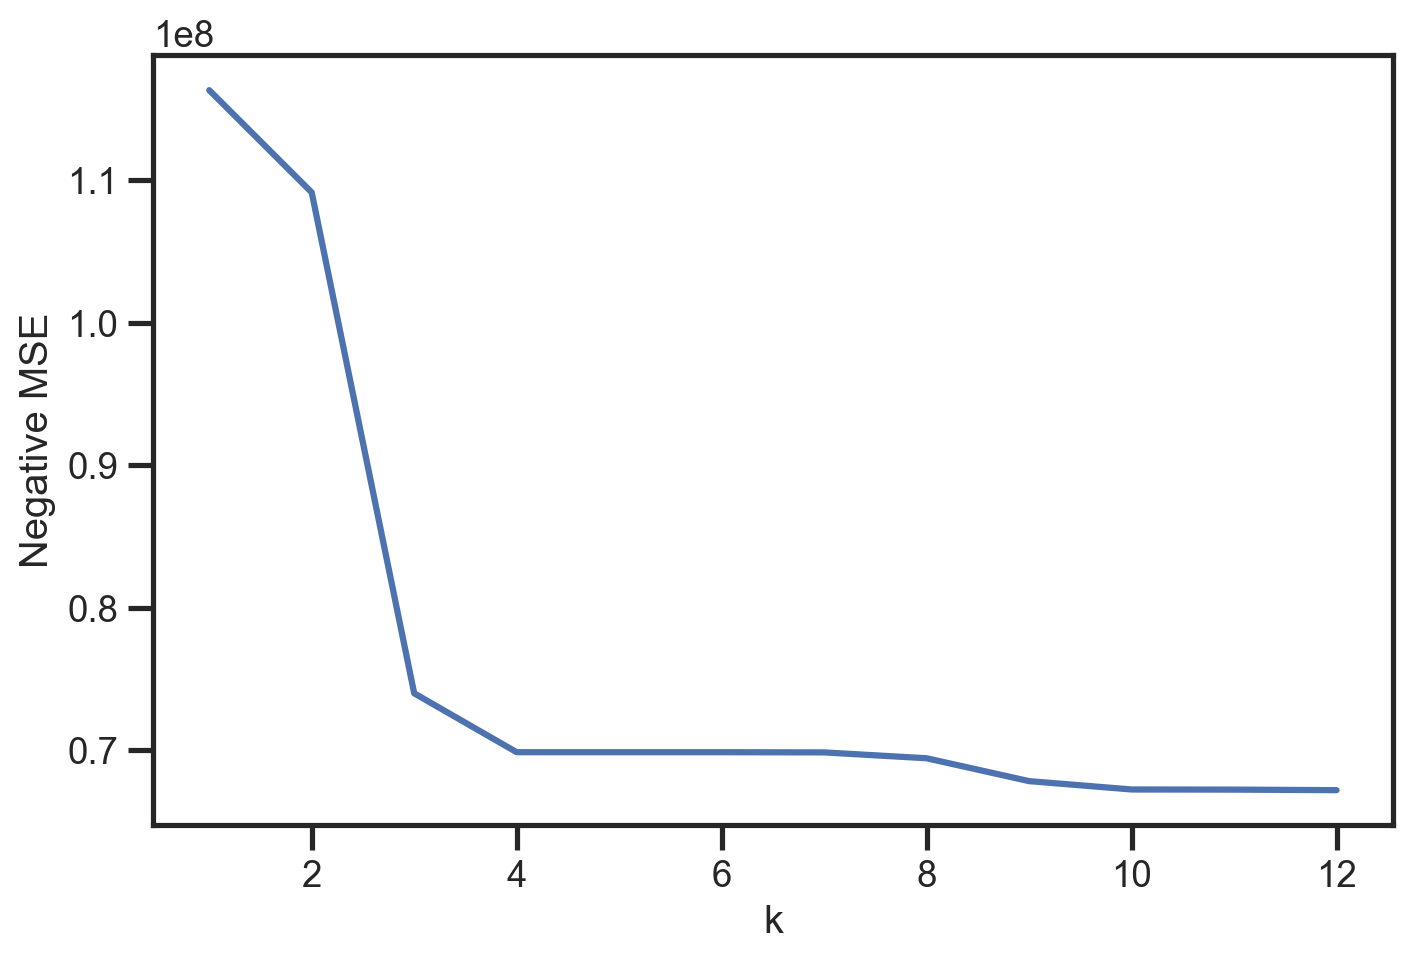

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression

# Define the range of k values to try
k_values = range(1, X_transformed.shape[1]+1)

# Perform cross-validation for each k value
cv_scores = []
for k in k_values:
    # Create a SelectKBest transformer with k features
    selector = SelectKBest(f_regression, k=k)
    # Transform the data using the selector
    X_selected = selector.fit_transform(X_transformed, y)
    # Train a linear regression model using cross-validation
    reg = LinearRegression()
    scores = cross_val_score(reg, X_selected, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Plot the mean squared error as a function of k
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Negative MSE')
plt.show()


In [119]:
selector = make_pipeline(
    SelectKBest(f_regression, k=10).fit(X_transformed, y)
).set_output(transform='pandas')

In [120]:
selector.get_feature_names_out()

array(['mileage', 'year_of_registration', 'vehicle_age',
       'average_mileage', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type', 'mileage_category'],
      dtype=object)

In [121]:
X_sel = selector.transform(X_transformed)

In [122]:
X_sel.head()

mileage  year_of_registration  vehicle_age  average_mileage  \
345286 -0.866278              0.721035    -0.721035        -0.721035   
283654  0.098926             -0.578603     0.578603         0.578603   
308679  1.541859             -2.094848     2.094848         2.094848   
348507 -0.195050             -0.145391     0.145391         0.145391   
54115  -0.236806              0.071216    -0.071216        -0.071216   

        standard_make  standard_model  vehicle_condition     body_type  \
345286   10734.475881    13788.521472       15242.317932  22346.710658   
283654    9345.955024     7749.854671       15242.317932  10446.658218   
308679   11288.023086     9039.437363       15242.317932  10446.658218   
348507   21471.806793    19334.856410       15242.317932  18872.255012   
54115    19710.171773    15298.288635       15242.317932  18872.255012   

           fuel_type  mileage_category  
345286  15406.717999      21804.880552  
283654  15406.717999      11944.842005  
308679  15406.717999      11944.842005  
348507  15406.717999      11944.842005  
54115   16532.830468      11944.842005

Dropping year_of_registration because it has similar information with "vehicle_age"

In [123]:
X_sel = X_sel.drop(columns = 'year_of_registration')

In [124]:
X_sel.head()

mileage  vehicle_age  average_mileage  standard_make  standard_model  \
345286 -0.866278    -0.721035        -0.721035   10734.475881    13788.521472   
283654  0.098926     0.578603         0.578603    9345.955024     7749.854671   
308679  1.541859     2.094848         2.094848   11288.023086     9039.437363   
348507 -0.195050     0.145391         0.145391   21471.806793    19334.856410   
54115  -0.236806    -0.071216        -0.071216   19710.171773    15298.288635   

        vehicle_condition     body_type     fuel_type  mileage_category  
345286       15242.317932  22346.710658  15406.717999      21804.880552  
283654       15242.317932  10446.658218  15406.717999      11944.842005  
308679       15242.317932  10446.658218  15406.717999      11944.842005  
348507       15242.317932  18872.255012  15406.717999      11944.842005  
54115        15242.317932  18872.255012  16532.830468      11944.842005

In [125]:
X_sel.columns

Index(['mileage', 'vehicle_age', 'average_mileage', 'standard_make',
       'standard_model', 'vehicle_condition', 'body_type', 'fuel_type',
       'mileage_category'],
      dtype='object')

### ENCODING THE NEEDED COLUMN

In [126]:
autotrader_model.head()

public_reference  mileage reg_code standard_colour  standard_make  \
345286   202007070940379   8223.0       19             Red        Renault   
283654   202008122387805  41000.0       13             Red         Suzuki   
308679   202010044573837  90000.0       06          Silver         Toyota   
348507   202010165088135  31017.0       65           Black  Mercedes-Benz   
54115    202009043300677  29599.0       16             Red            BMW   

       standard_model vehicle_condition  year_of_registration  price  \
345286         Kadjar              USED                2019.0  16000   
283654          Swift              USED                2013.0   4895   
308679          Yaris              USED                2006.0   1790   
348507        C Class              USED                2015.0  17000   
54115        3 Series              USED                2016.0  18417   

        body_type  crossover_car_and_van fuel_type  log_price  current_year  \
345286        SUV                  False    Petrol   9.680344          2023   
283654  Hatchback                  False    Petrol   8.495970          2023   
308679  Hatchback                  False    Petrol   7.489971          2023   
348507     Saloon                  False    Petrol   9.740969          2023   
54115      Saloon                  False    Diesel   9.821029          2023   

        vehicle_age  average_mileage mileage_category  
345286          4.0          29600.0      Low mileage  
283654         10.0          74000.0     Good mileage  
308679         17.0         125800.0     Good mileage  
348507          8.0          59200.0     Good mileage  
54115           7.0          51800.0     Good mileage

#### Drop the column not represented from our Selectkbest Feature selection.

In [127]:
autotrader_model = autotrader_model.drop(columns=['public_reference', 'reg_code','standard_colour','crossover_car_and_van','log_price','current_year','year_of_registration' ])

In [128]:
autotrader_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80142 entries, 345286 to 126056
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mileage            80142 non-null  float64
 1   standard_make      80142 non-null  object 
 2   standard_model     80142 non-null  object 
 3   vehicle_condition  80142 non-null  object 
 4   price              80142 non-null  int64  
 5   body_type          80142 non-null  object 
 6   fuel_type          80142 non-null  object 
 7   vehicle_age        80142 non-null  float64
 8   average_mileage    80142 non-null  float64
 9   mileage_category   80142 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.7+ MB


In [129]:
all_cat_columns = ['standard_make','standard_model', 'vehicle_condition', 'body_type', 'fuel_type','mileage_category']

autotrader_model[all_cat_columns].nunique()

standard_make         78
standard_model       850
vehicle_condition      2
body_type             17
fuel_type              8
mileage_category       4
dtype: int64

**One hot encoding** for columns with categories not more than 4, vehicle_condition and mileage_category

In [130]:
some_cat_feat = [ 'vehicle_condition','mileage_category']
autotrader_sampled_encoded= pd.get_dummies(autotrader_model, columns=some_cat_feat)

**Target encoding** is used for columns with category more than 4,standard_make, standard_model, body_type and fuel_type.

In [131]:
import category_encoders as ce

# define the columns to encode
columns_to_encode = ['standard_make', 'standard_model', 'body_type','fuel_type']

# create a target encoder instance
target_encoder = ce.TargetEncoder(cols=columns_to_encode)

# fit the target encoder to your data
target_encoder.fit(autotrader_model[columns_to_encode], autotrader_sampled_encoded['price'])

# transform the encoded columns and replace them in your original DataFrame
autotrader_sampled_encoded[columns_to_encode] = target_encoder.transform(autotrader_sampled_encoded[columns_to_encode])


In [132]:
autotrader_sampled_encoded.head()

mileage  standard_make  standard_model  price     body_type  \
345286   8223.0   10734.475881    13788.521472  16000  22346.710658   
283654  41000.0    9345.955024     7749.854671   4895  10446.658218   
308679  90000.0   11288.023086     9039.437363   1790  10446.658218   
348507  31017.0   21471.806793    19334.856410  17000  18872.255012   
54115   29599.0   19710.171773    15298.288635  18417  18872.255012   

           fuel_type  vehicle_age  average_mileage  vehicle_condition_NEW  \
345286  15406.717999          4.0          29600.0                      0   
283654  15406.717999         10.0          74000.0                      0   
308679  15406.717999         17.0         125800.0                      0   
348507  15406.717999          8.0          59200.0                      0   
54115   16532.830468          7.0          51800.0                      0   

        vehicle_condition_USED  mileage_category_Good mileage  \
345286                       1                              0   
283654                       1                              1   
308679                       1                              1   
348507                       1                              1   
54115                        1                              1   

        mileage_category_High mileage  mileage_category_Low mileage  \
345286                              0                             1   
283654                              0                             0   
308679                              0                             0   
348507                              0                             0   
54115                               0                             0   

        mileage_category_Very High mileage  
345286                                   0  
283654                                   0  
308679                                   0  
348507                                   0  
54115                                    0

In [133]:
autotrader_nopca = autotrader_sampled_encoded.copy()

### DIMENTIONALITY REDUCTION (PCA)

In [134]:
#Drop Price for PCA 
autotrader_sampled_encoded = autotrader_sampled_encoded.drop(columns = 'price')

In [135]:
autotrader_sampled_encoded.columns

Index(['mileage', 'standard_make', 'standard_model', 'body_type', 'fuel_type',
       'vehicle_age', 'average_mileage', 'vehicle_condition_NEW',
       'vehicle_condition_USED', 'mileage_category_Good mileage',
       'mileage_category_High mileage', 'mileage_category_Low mileage',
       'mileage_category_Very High mileage'],
      dtype='object')

elbow method" where you plot the explained variance ratio as a function of the number of components and look for the point where the curve starts to level off or plateau

In [136]:
#Scale before PCA
scaler = StandardScaler()
scaler.fit(autotrader_sampled_encoded)
X_scaled = scaler.transform(autotrader_sampled_encoded)

In [137]:
pca_full = PCA()
pca_full.fit(X_scaled)

PCA()

In [138]:
pca_full.components_

array([[ 4.06356201e-01, -3.05819457e-02, -1.27293303e-01,
        -6.55290058e-02, -1.12078571e-01,  4.40085442e-01,
         4.40085442e-01, -3.56744766e-01,  3.56744766e-01,
         2.56578557e-01, -1.03305008e-01, -2.55039161e-01,
         1.32085725e-01],
       [ 1.41845170e-01,  5.71286331e-01,  5.94271107e-01,
         4.74953123e-01,  1.42450879e-01,  9.65127801e-02,
         9.65127801e-02,  3.86963727e-02, -3.86963727e-02,
        -2.32193319e-02,  9.23141991e-02, -9.79573898e-02,
         1.19163984e-01],
       [-3.05946678e-01,  1.47866668e-01,  1.29765115e-01,
         7.73508031e-02, -4.16591192e-02, -3.94715364e-02,
        -3.94715364e-02, -4.24626570e-01,  4.24626570e-01,
        -9.77760054e-02, -4.71076661e-01,  4.87805992e-01,
        -1.63752738e-01],
       [ 2.22715887e-01, -4.61795674e-02, -7.54555258e-02,
        -8.43519641e-02,  1.91494356e-02,  7.78304270e-02,
         7.78304270e-02, -2.67382057e-02,  2.67382057e-02,
        -6.88623674e-01,  1.09845624e

In [139]:
pca_full.explained_variance_ratio_

array([3.01456403e-01, 1.57345037e-01, 1.44796890e-01, 1.04470762e-01,
       7.96574303e-02, 7.02248529e-02, 6.29074844e-02, 5.17148379e-02,
       2.00860799e-02, 7.34022270e-03, 3.15788928e-32, 1.37037295e-33,
       2.58325049e-34])

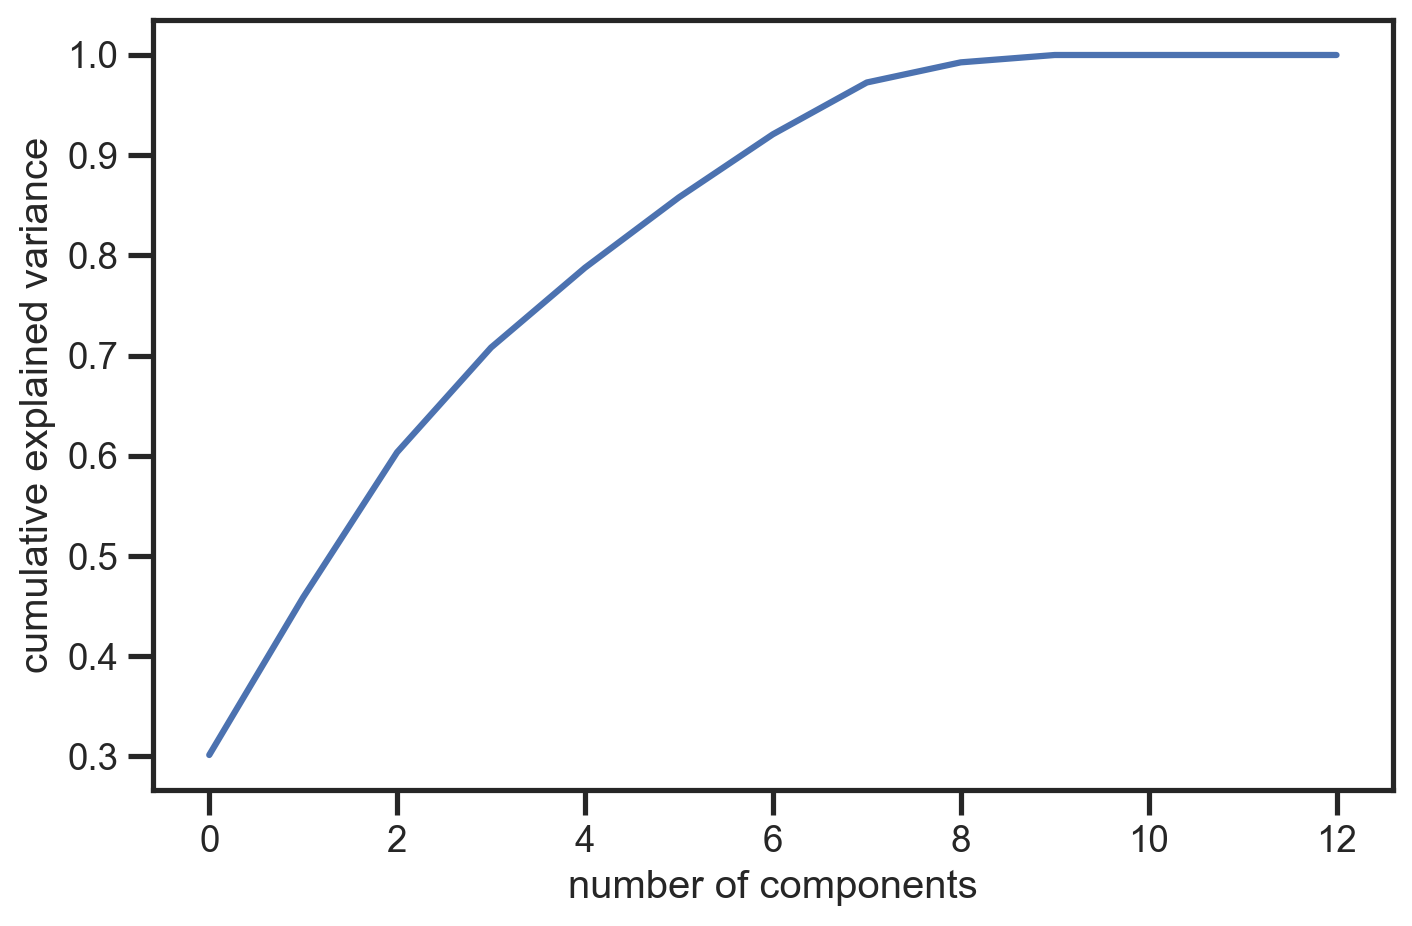

In [140]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [141]:
# keep the first ten principal components of the data
pca = PCA(n_components=8)
# fit PCA model to autotrader dataset
pca.fit(X_scaled)

# transform data onto the first ten principal components
autotrader_sampled_encoded = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(autotrader_sampled_encoded.shape)))

Original shape: (80142, 13)
Reduced shape: (80142, 8)


Text(0, 0.5, 'Principal components')

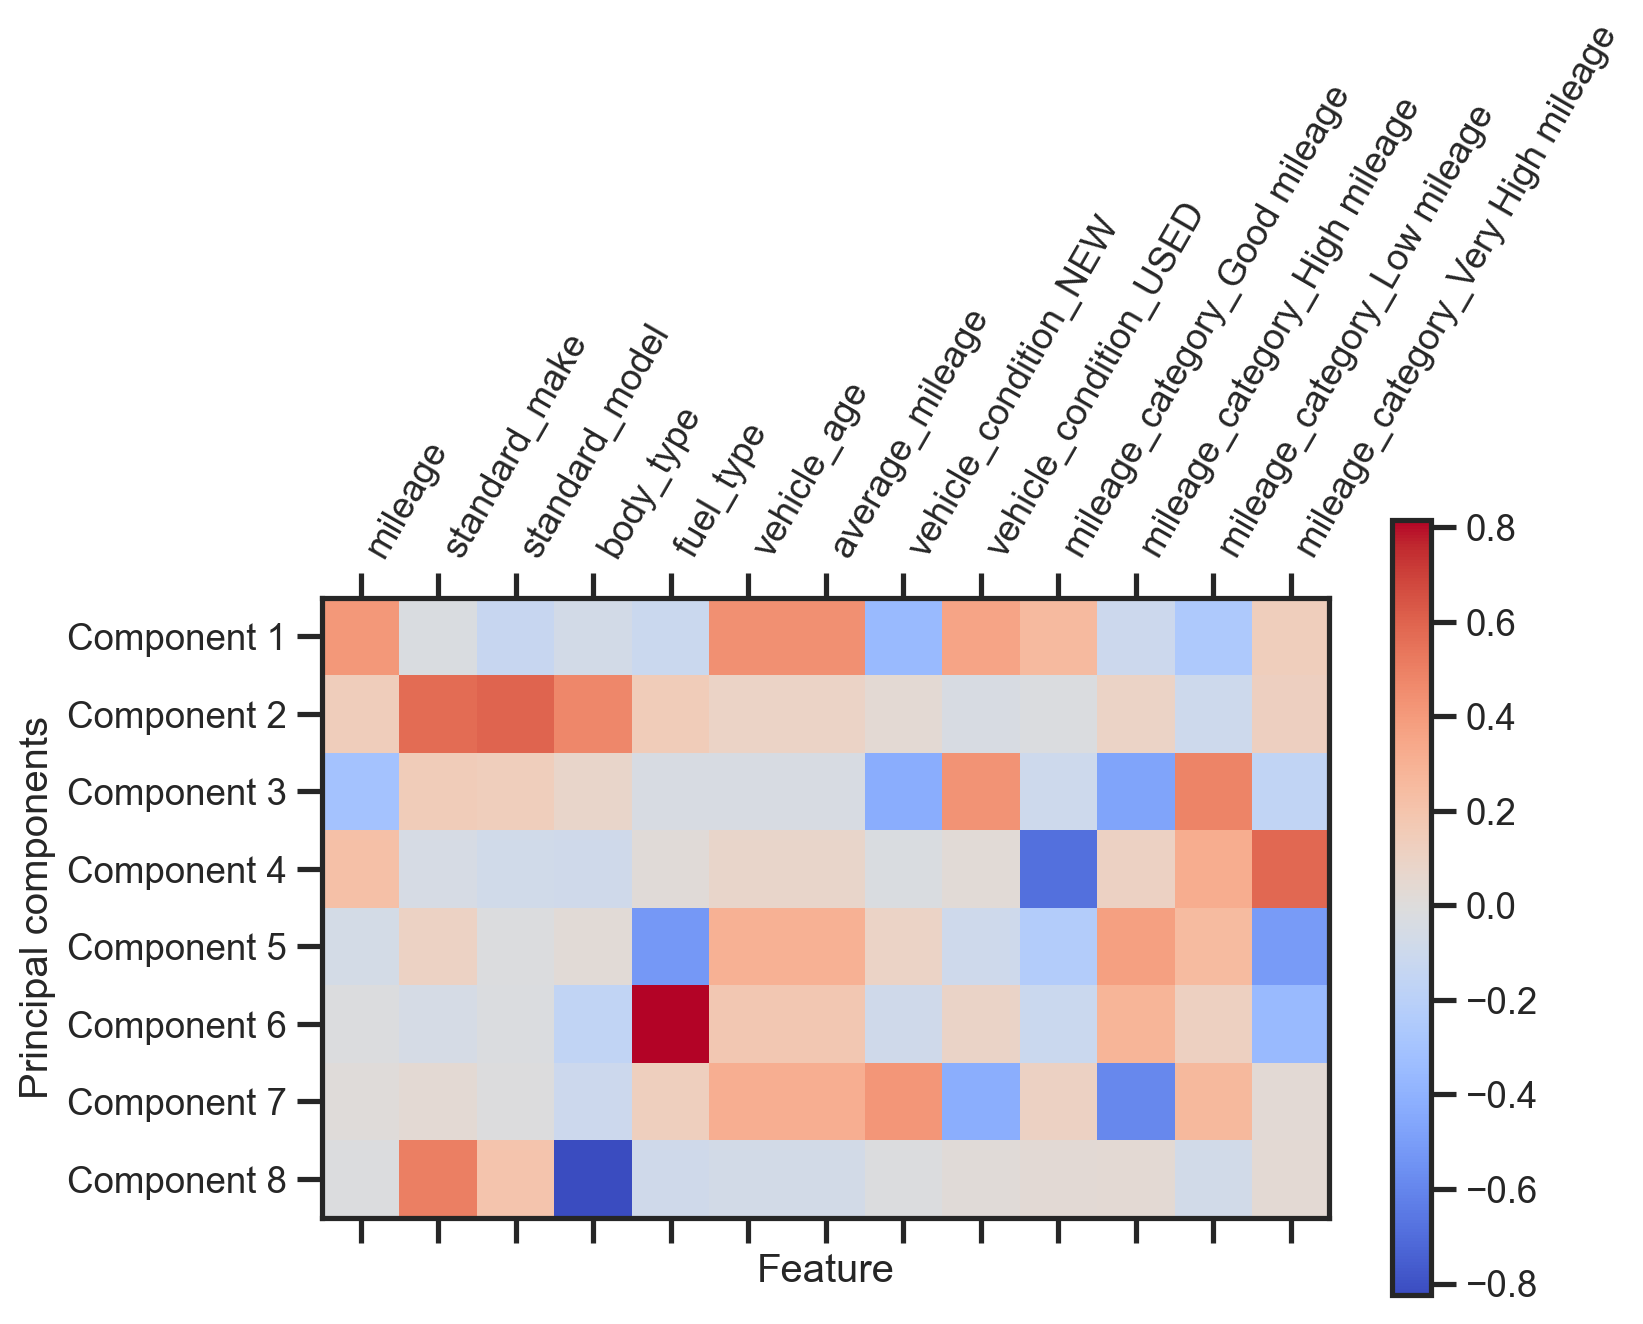

In [142]:
# Create a matshow plot of the first 7 principal components
plt.matshow(pca.components_[:8,:], cmap='coolwarm')
plt.yticks(np.arange(8), ["Component"+" "+str(i+1) for i in range(8)])
plt.colorbar()

# Set the x-axis ticks to be the feature names
feature_names = ['mileage', 'standard_make', 'standard_model', 'body_type',
       'fuel_type', 'vehicle_age', 'average_mileage', 'vehicle_condition_NEW',
       'vehicle_condition_USED', 'mileage_category_Good mileage',
       'mileage_category_High mileage', 'mileage_category_Low mileage',
       'mileage_category_Very High mileage']
plt.xticks(range(len(feature_names)), feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")


In [143]:
autotrader_pca = pd.DataFrame(autotrader_sampled_encoded, columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5','Component 6','Component 7','Component 8'])


In [144]:
autotrader_pca.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0    -1.267693    -0.502146     1.414911     0.406941     0.199027   
1     1.514325    -1.308744    -0.417357    -1.010616    -0.113467   
2     3.414207    -0.632275    -0.935031    -0.470992     0.733347   
3     0.749222     0.541504     0.128699    -1.396785    -0.217104   
4     0.557274     0.220532     0.070753    -1.397248    -0.529298   

   Component 6  Component 7  Component 8  
0    -0.378212    -0.430200    -1.109367  
1    -0.056229     0.280917     0.367355  
2     0.446883     1.246958     0.272442  
3    -0.509746    -0.101431     0.083734  
4    -0.299582    -0.197437    -0.076427

### MODEL BUILDING

In [145]:
#split into training/test sets
X = autotrader_pca
y = autotrader_sampled["price"]
X.shape,y.shape

((80142, 8), (80142,))

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1000)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60106, 8), (20036, 8), (60106,), (20036,))

In [147]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


### POLYNOMIAL REGRESSION WITH GRID SEARCH

Scaling done on PCA already so not needed for polynomial again

In [148]:
poly2 = Pipeline(steps=[
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('regr', Ridge())
]).set_output(transform='pandas')

In [149]:
param_grid = dict(
    regr__alpha=[0.001, 0.01, 0.1, 1, 10, 100],
    polynomial__degree=[2, 3, 4]
)

In [150]:
poly2_grid = GridSearchCV(
    poly2,
    param_grid,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    cv=5
)

In [151]:
poly2_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('regr', Ridge())]),
             param_grid={'polynomial__degree': [2, 3, 4],
                         'regr__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [152]:
poly2_grid_results = pd.DataFrame(poly2_grid.cv_results_)
poly2_grid_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_polynomial__degree', 'param_regr__alpha', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [153]:
poly2_grid_results[[
    'param_polynomial__degree', 'param_regr__alpha', 
    'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score',
    'rank_test_score'
]].sort_values('rank_test_score')

param_polynomial__degree param_regr__alpha  mean_test_score  \
6                         3             0.001     -6220.486220   
17                        4               100     -6233.079655   
7                         3              0.01     -6234.973230   
8                         3               0.1     -6248.227815   
9                         3                 1     -6254.470229   
10                        3                10     -6278.748232   
11                        3               100     -6321.681349   
16                        4                10     -6352.208368   
15                        4                 1     -6617.189663   
12                        4             0.001     -6730.128582   
14                        4               0.1     -6810.626827   
13                        4              0.01     -6812.931171   
1                         2              0.01     -6921.589982   
0                         2             0.001     -6921.621468   
2                         2               0.1     -6924.235597   
3                         2                 1     -6934.847863   
4                         2                10     -6954.838074   
5                         2               100     -6989.904312   

    std_test_score  mean_train_score  std_train_score  rank_test_score  
6       249.879361      -6125.858980        61.950275                1  
17      242.711795      -5982.116991        59.435157                2  
7       245.456771      -6144.303104        60.432944                3  
8       242.422066      -6160.661146        59.401908                4  
9       237.770137      -6168.745279        59.142387                5  
10      229.173897      -6199.596273        57.988203                6  
11      225.136513      -6253.872776        55.950969                7  
16      304.108999      -5918.643812        60.202766                8  
15      500.957777      -5889.981302        59.641899                9  
12      546.687159      -5826.826105        59.597114               10  
14      670.866725      -5872.576192        59.456416               11  
13      663.440901      -5849.951121        59.651249               12  
1       277.422420      -6875.670501        70.513209               13  
0       277.967885      -6875.568756        70.522840               14  
2       274.650147      -6879.121665        70.204702               15  
3       269.732942      -6890.754837        69.289387               16  
4       261.920249      -6910.382570        67.505858               17  
5       256.361562      -6943.442960        65.739783               18

In [154]:
poly2_model = poly2_grid.best_estimator_

In [155]:
# make predictions
predictions = poly2_model.predict(X_test)

# evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


# add the results to the models dataframe
new_row = {"Model": "PolynomialRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame(new_row, index=[0])], ignore_index=True)


MAE: 3127.8290472921344
MSE: 34475851.846815705
RMSE: 5871.614075091764
R2 Score: 0.8659648721061044


### RANDOM FOREST REGRESSION WITH GRID SEARCH

In [156]:
rf = RandomForestRegressor(random_state=1000)

In [157]:
param_grid_rfr = {
    'n_estimators': [25, 50, 75, 100,125,150],
    'max_depth': [2, 3, 4, 5],
}

In [158]:
grid_rfr = GridSearchCV(
    rf,
    param_grid_rfr,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    cv=5
)

In [159]:
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [25, 50, 75, 100, 125, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [160]:
grid_rfr_results = pd.DataFrame(grid_rfr.cv_results_)
grid_rfr_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [161]:
grid_rfr_results[
    ['param_max_depth','param_n_estimators', 'mean_train_score', 'std_train_score',
     'mean_test_score','std_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

param_max_depth param_n_estimators  mean_train_score  std_train_score  \
23               5                150      -7005.561088        72.348615   
21               5                100      -7008.986774        71.625558   
20               5                 75      -7012.829281        80.090492   
22               5                125      -7009.538215        73.822323   
19               5                 50      -7017.519931        77.021522   
18               5                 25      -7034.645309        82.174140   
12               4                 25      -7952.941813        84.308673   
15               4                100      -7945.199238        81.738922   
17               4                150      -7944.209096        82.892749   
14               4                 75      -7949.220861        87.186218   
13               4                 50      -7950.639134        81.562223   
16               4                125      -7948.193846        84.578382   
6                3                 25      -9365.342196        90.094628   
11               3                150      -9369.977983        72.805082   
9                3                100      -9369.576654        71.163279   
8                3                 75      -9371.701825        77.407705   
7                3                 50      -9374.279336        75.835786   
10               3                125      -9373.677761        71.349991   
0                2                 25     -11009.360499       102.069840   
1                2                 50     -11020.518297        87.337285   
2                2                 75     -11022.955163        84.559632   
5                2                150     -11023.157415        80.164428   
3                2                100     -11023.399713        79.177436   
4                2                125     -11024.857438        80.728966   

    mean_test_score  std_test_score  rank_test_score  
23     -7289.440455      265.107362                1  
21     -7289.847164      268.485231                2  
20     -7292.002529      260.984458                3  
22     -7293.795405      265.587006                4  
19     -7300.526572      259.095589                5  
18     -7318.069147      264.928570                6  
12     -8096.333149      280.850138                7  
15     -8098.848441      278.219543                8  
17     -8099.297572      273.082517                9  
14     -8100.638627      269.538471               10  
13     -8101.747186      273.969728               11  
16     -8104.078338      272.553860               12  
6      -9449.641237      265.832903               13  
11     -9458.284984      267.494290               14  
9      -9459.175853      269.873574               15  
8      -9461.303734      261.432482               16  
7      -9462.795729      262.896339               17  
10     -9463.940808      270.821290               18  
0     -11053.632289      242.335420               19  
1     -11064.370483      229.592126               20  
2     -11066.901276      229.000111               21  
5     -11067.462438      232.592591               22  
3     -11067.946801      231.945480               23  
4     -11071.298782      231.710061               24

In [162]:
rf_model = grid_rfr.best_estimator_

In [163]:
# make predictions
predictions = rf_model.predict(X_test)

# evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

# add the results to the models dataframe
new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame(new_row, index=[0])], ignore_index=True)

MAE: 4267.2769630408875
MSE: 46577333.508195244
RMSE: 6824.758860809314
R2 Score: 0.8189167629137436


### GRADIENT BOOSTING REGRESSOR WITH GRID SEARCH

In [164]:
gb = GradientBoostingRegressor(random_state=1000)

In [165]:
param_grid_gb = {
    'n_estimators': [25, 50, 75, 100,125],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [2, 3, 4]
}

In [166]:
grid_gb = GridSearchCV(
    gb,
    param_grid_gb,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    cv=5,
    n_jobs=-1, 
    verbose=2
)

In [167]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1000),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [25, 50, 75, 100, 125]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [168]:
grid_gb_results = pd.DataFrame(grid_gb.cv_results_)
grid_gb_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [169]:
grid_gb_results[
    ['param_n_estimators','param_learning_rate','param_max_depth', 'mean_train_score', 'std_train_score',
     'mean_test_score', 'std_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

param_n_estimators param_learning_rate param_max_depth  mean_train_score  \
44                125                 0.1               4      -5225.636454   
43                100                 0.1               4      -5377.138892   
42                 75                 0.1               4      -5568.161204   
39                125                 0.1               3      -5753.791120   
41                 50                 0.1               4      -5810.995997   
38                100                 0.1               3      -5903.485517   
37                 75                 0.1               3      -6076.636976   
34                125                 0.1               2      -6287.394375   
36                 50                 0.1               3      -6281.250945   
33                100                 0.1               2      -6395.067814   
40                 25                 0.1               4      -6430.705643   
32                 75                 0.1               2      -6546.204002   
31                 50                 0.1               2      -6878.550845   
35                 25                 0.1               3      -7010.273044   
30                 25                 0.1               2      -7985.478258   
29                125                0.01               4      -8268.856618   
24                125                0.01               3      -8927.614189   
28                100                0.01               4      -9108.183180   
23                100                0.01               3      -9721.909811   
19                125                0.01               2     -10166.691005   
27                 75                0.01               4     -10230.105219   
22                 75                0.01               3     -10778.247020   
18                100                0.01               2     -10928.231750   
26                 50                0.01               4     -11753.580081   
17                 75                0.01               2     -11868.990866   
21                 50                0.01               3     -12197.136862   
16                 50                0.01               2     -13047.994832   
25                 25                0.01               4     -13812.611864   
20                 25                0.01               3     -14056.677620   
15                 25                0.01               2     -14544.518066   
14                125               0.001               4     -15067.003481   
9                 125               0.001               3     -15223.973594   
13                100               0.001               4     -15337.531486   
4                 125               0.001               2     -15460.450423   
8                 100               0.001               3     -15470.007006   
12                 75               0.001               4     -15615.181984   
3                 100               0.001               2     -15656.652886   
7                  75               0.001               3     -15714.545075   
2                  75               0.001               2     -15856.971517   
11                 50               0.001               4     -15899.790479   
6                  50               0.001               3     -15966.126195   
1                  50               0.001               2     -16062.114245   
10                 25               0.001               4     -16192.958341   
5                  25               0.001               3     -16226.261311   
0                  25               0.001               2     -16274.716440   

    std_train_score  mean_test_score  std_test_score  rank_test_score  
44        42.250897     -5996.037941      237.830771                1  
43        51.610613     -6060.609876      236.222535                2  
42        53.838498     -6154.170081      236.297727                3  
39        67.564250     -6240.236570      234.058376                4  
41      

In [170]:
gb_model = grid_gb.best_estimator_

In [171]:
predictions = gb_model.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame(new_row, index=[0])], ignore_index=True)


MAE: 2991.0202279287846
MSE: 29733703.799561016
RMSE: 5452.861982441974
R2 Score: 0.884401383053818


### ESEMBLE(VotingRegressor)

In [172]:
ensembled_model = [poly2_model, rf_model, gb_model ]

In [173]:
for est in ensembled_model:
    est.fit(X_train, y_train)

In [174]:
ensemble = VotingRegressor(
    [
        ("poly2", poly2_model), 
        ("rf", rf_model), 
        ("gb", gb_model)
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('poly2',
                             Pipeline(steps=[('polynomial',
                                              PolynomialFeatures(degree=3,
                                                                 include_bias=False)),
                                             ('regr', Ridge(alpha=0.001))])),
                            ('rf',
                             RandomForestRegressor(max_depth=5,
                                                   n_estimators=150,
                                                   random_state=1000)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=4,
                                                       n_estimators=125,
                                                       random_state=1000))])

In [175]:
all_regr = ensembled_model + [ ensemble ]

In [176]:
predictions = ensemble.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Esemble(VotingRegressor)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame(new_row, index=[0])], ignore_index=True)


MAE: 3169.7953206459542
MSE: 31983033.75846687
RMSE: 5655.354432612236
R2 Score: 0.8756564438407971


### Overall Performance with Cross-Validation USING RMSE and MAE

In [178]:
for est in all_regr:
    scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(scores.mean()*-1, scores.std())

6220.4862202815475 249.87936050967025
7289.440455410573 265.1073623620966
5996.037940846794 237.83077128338576
6141.206506793489 246.02583128027598


The overall performance with cross-validation is the average root mean squared error (RMSE) across all the folds of the cross-validation. From the results you above, the overall performance of the four models is:  

Polynomial Regression: 6220  
RandomForest Regression: 7289   
Gradient Boosting Regression: 5980  
Essemble(VotingRegressor): 6136 

Lower RMSE values indicate better performance, so it looks like the Gradient Boosting Regression model has the best overall performance among the four models tested.  

The standard deviation of the RMSE scores provides information about the variability of the model's performance across different folds of the data. A lower value of the standard deviation suggests that the model is less sensitive to the choice of training and validation sets.

In [179]:
for est in all_regr:
    scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(scores.mean()*-1, scores.std())

3180.9413862386405 36.839306484399756
4333.876235607318 81.67758613620815
3075.3139228024975 49.117858896069094
3238.2714674287513 54.581845022381735


### True vs Predicted Analysis Using Gradient boost which is the best model

In [180]:
y_test

310224    19490
253113    26360
74390     13400
178432    41000
258831    36141
          ...  
19390     33799
130572    12791
166055     7999
301673    31750
206485    11495
Name: price, Length: 20036, dtype: int64

In [181]:
y_pred = gb_model.predict(X_test)

In [182]:
# convert y_pred and y_test to pandas Series
y_pred_series = pd.Series(y_pred, name='predicted_price')
y_test_series = pd.Series(y_test, name='true_price')

# reset the indices to be consecutive integers
y_pred_series.reset_index(drop=True, inplace=True)
y_test_series.reset_index(drop=True, inplace=True)

# concatenate the two Series into a DataFrame
result = pd.concat([y_test_series, y_pred_series], axis=1)

# compute the difference between predicted and true prices
result['price_diff'] = np.abs(result['predicted_price'] - result['true_price'])


In [183]:
result.sample(5)

true_price  predicted_price   price_diff
7866         9995     10271.899551   276.899551
15589       14100     17642.861228  3542.861228
2544         1975      3477.191449  1502.191449
2081        16254     17242.209902   988.209902
7569        27000     23029.652502  3970.347498

In [184]:
np.mean(result['price_diff'])

2991.0202279287846

Text(0, 0.5, 'Predicted Price')

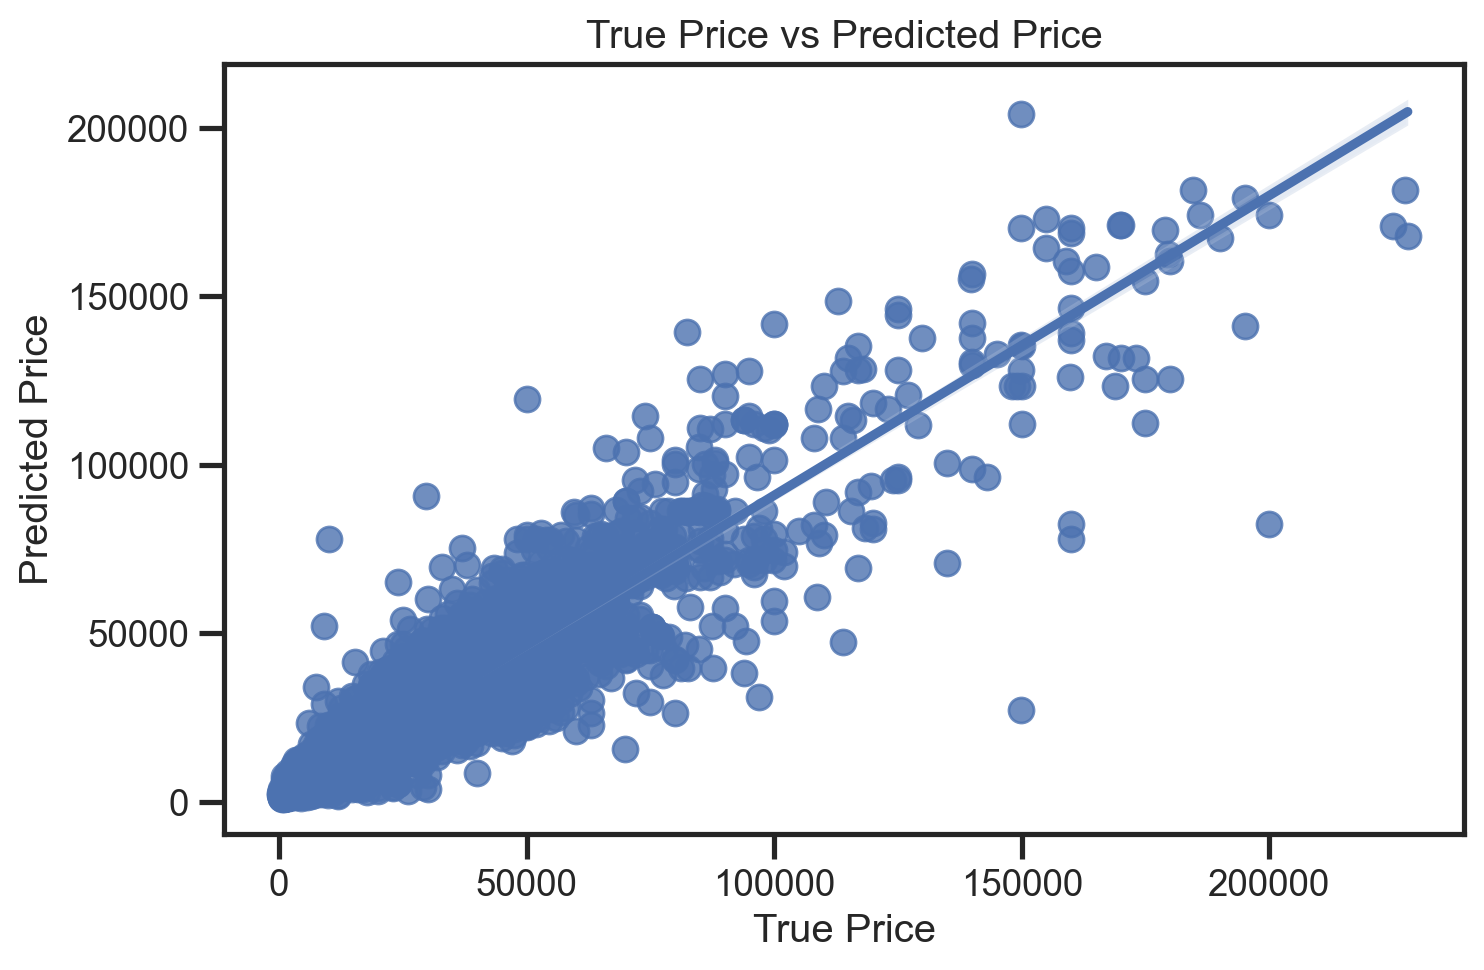

In [185]:
# plot regplot using seaborn
sns.regplot(x='true_price', y='predicted_price', data=result)

# set title and labels for the plot
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

Ideally, all points should be close to a regressed diagonal line. So, if the Actual is 5, predicted should be reasonably close to 5.  
For perfect prediction, Predicted=Actual, or 𝑥=𝑦, so the graph shows how much the prediction deviated from actual value (the prediction error).

In the graph, the prediction was mostly overestimating the actual outcome (𝑦>𝑥)

The points that are tightly clustered around the diagonal line that is where price is less than 100,000 indicates that the model has high accuracy and is making good predictions. On the other hand, the points that are scattered widely, indicate that the model is not performing well and which suggest that our model only predicts well for vehicle that are less than 100,000.

## SHAP, ICE AND PDP

In [186]:
autotrader_model.head()

mileage  standard_make standard_model vehicle_condition  price  \
345286   8223.0        Renault         Kadjar              USED  16000   
283654  41000.0         Suzuki          Swift              USED   4895   
308679  90000.0         Toyota          Yaris              USED   1790   
348507  31017.0  Mercedes-Benz        C Class              USED  17000   
54115   29599.0            BMW       3 Series              USED  18417   

        body_type fuel_type  vehicle_age  average_mileage mileage_category  
345286        SUV    Petrol          4.0          29600.0      Low mileage  
283654  Hatchback    Petrol         10.0          74000.0     Good mileage  
308679  Hatchback    Petrol         17.0         125800.0     Good mileage  
348507     Saloon    Petrol          8.0          59200.0     Good mileage  
54115      Saloon    Diesel          7.0          51800.0     Good mileage

In [187]:
autotrader_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80142 entries, 345286 to 126056
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mileage            80142 non-null  float64
 1   standard_make      80142 non-null  object 
 2   standard_model     80142 non-null  object 
 3   vehicle_condition  80142 non-null  object 
 4   price              80142 non-null  int64  
 5   body_type          80142 non-null  object 
 6   fuel_type          80142 non-null  object 
 7   vehicle_age        80142 non-null  float64
 8   average_mileage    80142 non-null  float64
 9   mileage_category   80142 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.7+ MB


In [188]:
X_model = autotrader_model.drop(columns = 'price')
y_model = autotrader_model['price']

In [189]:
X_model.columns

Index(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'body_type', 'fuel_type', 'vehicle_age', 'average_mileage',
       'mileage_category'],
      dtype='object')

In [190]:
X_model_train, X_model_test, y_model_train, y_model_test = train_test_split(X_model, y_model, test_size=1/4, random_state=0)

In [191]:
numeric_features = X_model.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(
    steps=[
        #("imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')

In [192]:
from category_encoders import TargetEncoder

categorical_features = X_model.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(
    steps=[        #("imputer", SimpleImputer(strategy="most_frequent")),         
                    ("te", TargetEncoder()),    ]
).set_output(transform='pandas')

In [193]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [194]:
from sklearn.ensemble import HistGradientBoostingRegressor
regr_model = HistGradientBoostingRegressor(
    max_depth=8, max_iter=400
)


In [195]:
regr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regr", regr_model)
    ]
).set_output(transform="pandas")

In [196]:
regr_pipe.fit(X_model_train, y_model_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'vehicle_age',
                                                   'average_mileage']),
                                                 ('cat',
                                                  Pipeline(steps=[('te',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type',
                                                   'mileage_category'])],
                                   verbose_feature_names_out=False)),
                ('regr',
                 HistGradientBoostingRegressor(max_depth=8, max_iter=400))])

In [197]:
from sklearn.metrics import mean_squared_error
from functools import partial
rmse = partial(mean_squared_error, squared=False)
rmse(y_model_test, regr_pipe.predict(X_model_test))

4466.17381672489

In [200]:
X_model_encoded = preprocessor.fit_transform(X_model_train, y_model_train)
print(X_model_encoded.head())


         mileage  vehicle_age  average_mileage  standard_make  standard_model  \
315186  1.119892     0.581254         0.581254   19714.583672    18375.950081   
186464 -0.512185    -0.285510        -0.285510    8327.590082     5603.367742   
229298 -0.899909    -0.502201        -0.502201   19714.583672    13200.545694   
142173 -1.108768    -0.718892        -0.718892    9138.103654    14883.145362   
146830 -0.471772    -0.718892        -0.718892    8327.590082    10285.743882   

        vehicle_condition     body_type     fuel_type  mileage_category  
315186       15256.961615  16213.303892  16532.793828      18246.735699  
186464       15256.961615  10477.218294  15405.934635      21836.512276  
229298       15256.961615  10477.218294  16532.793828      21836.512276  
142173       15256.961615  22304.485544  15405.934635      21836.512276  
146830       15256.961615  10477.218294  15405.934635      11949.255559  


### SHapley Additive exPlanations (SHAP)

In [201]:
explainer = shap.TreeExplainer(regr_pipe['regr'])

In [202]:
explainer = shap.TreeExplainer(regr_model)

In [203]:
shap_values = explainer.shap_values(
    regr_pipe['preprocessor'].transform(X_model)
)

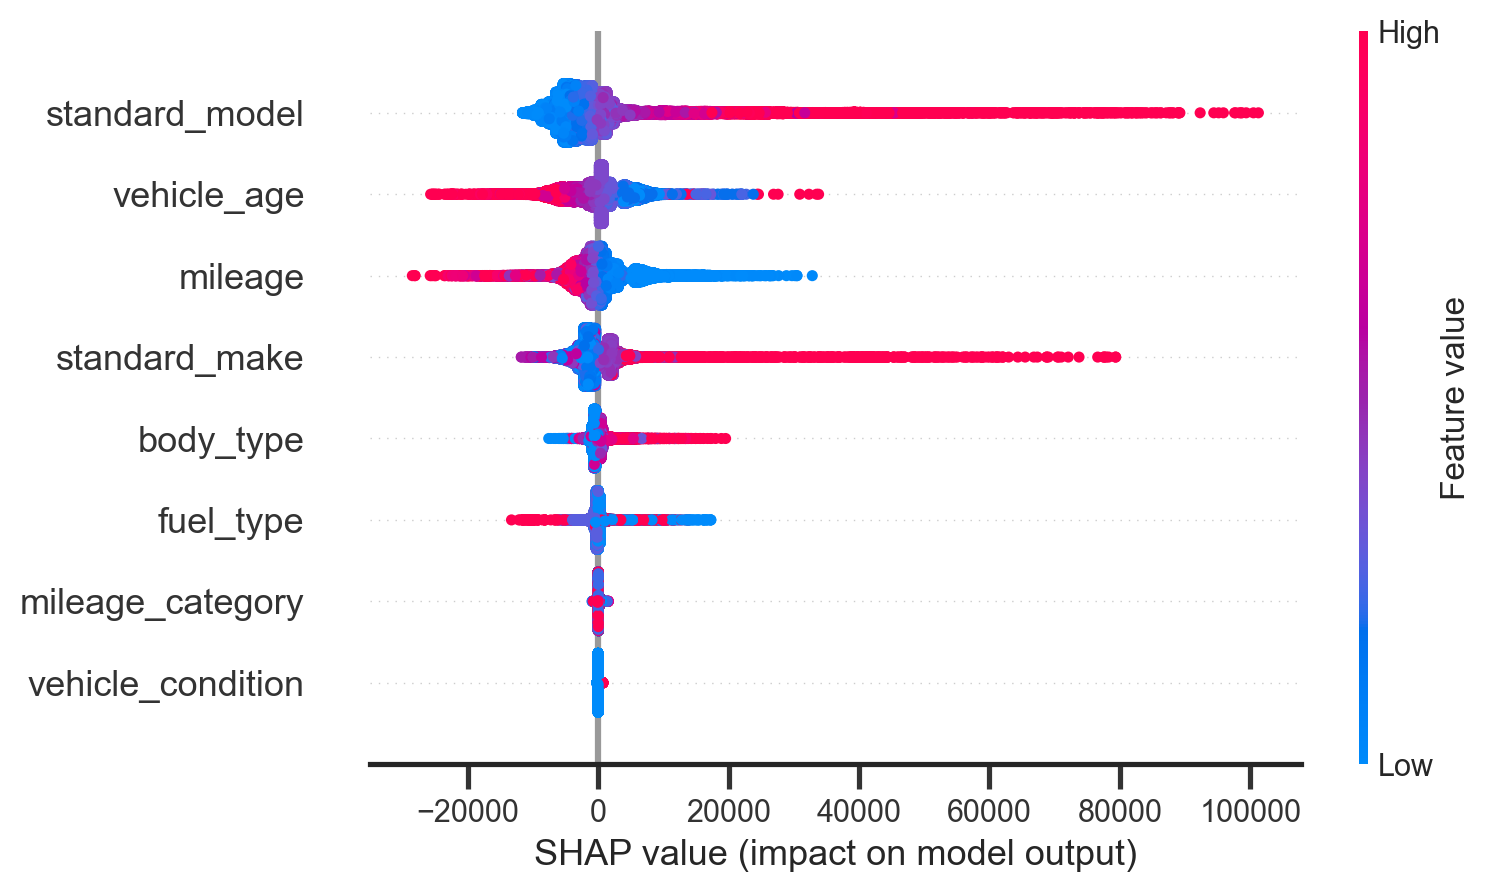

In [204]:
shap.summary_plot(
    shap_values, 
    regr_pipe['preprocessor'].transform(X_model),
    max_display=8
)

The sharp summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value of an instance per feature. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value of each instance. The combined feature standard model and standard make are the most important feature, has a high Shapley value range. The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.  

Feature importance: Features(variable) are ranked in descending order.  
Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.  
Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.  
Correlation: A high level of the “mileage and standard make” has a high and positive impact on the price and it is negatively correlated. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. 

#### Seeing one feature with pdp

In [207]:
from sklearn.inspection import PartialDependenceDisplay

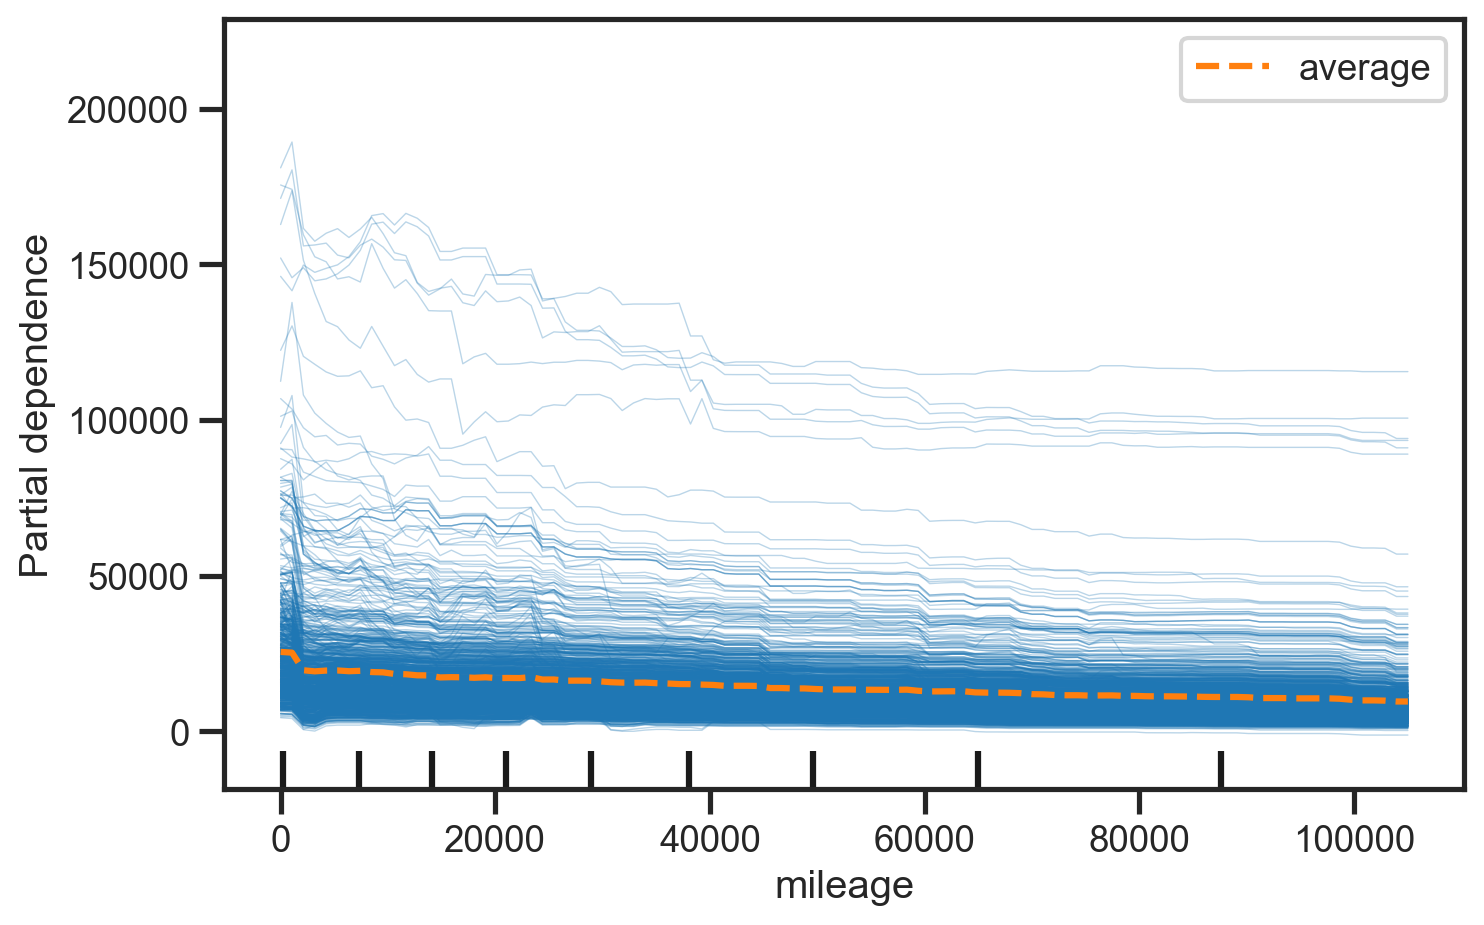

In [208]:
PartialDependenceDisplay.from_estimator(
    regr_pipe, X_model, features=['mileage'], kind='both'
);

#### I know I can view PDP without ICE but will like to see what ICE for mileage is

### Individual Conditional Expectation (ICE)

In [209]:
X_model['mileage'].min(), X_model['mileage'].max()

(0.0, 196000.0)

In [210]:
mil_synth_data = np.linspace(X_model['mileage'].min(), X_model['mileage'].max(), 100)
mil_synth_data[:5], mil_synth_data[-5:]

(array([   0.        , 1979.7979798 , 3959.5959596 , 5939.39393939,
        7919.19191919]),
 array([188080.80808081, 190060.60606061, 192040.4040404 , 194020.2020202 ,
        196000.        ]))

In [211]:
an_instance = X_model.sample(1, random_state=42).drop(columns='mileage')
an_instance

standard_make standard_model vehicle_condition body_type fuel_type  \
124863        Jaguar             XF              USED    Saloon    Diesel   

        vehicle_age  average_mileage mileage_category  
124863          7.0          51800.0     High mileage

In [212]:
temp_synth_df = pd.DataFrame(mil_synth_data, columns=['mileage'])
temp_synth_df.head()

mileage
0     0.000000
1  1979.797980
2  3959.595960
3  5939.393939
4  7919.191919

In [213]:
synth_df = an_instance.merge(temp_synth_df, how='cross')
print(synth_df.shape)
synth_df

(100, 9)


standard_make standard_model vehicle_condition body_type fuel_type  \
0         Jaguar             XF              USED    Saloon    Diesel   
1         Jaguar             XF              USED    Saloon    Diesel   
2         Jaguar             XF              USED    Saloon    Diesel   
3         Jaguar             XF              USED    Saloon    Diesel   
4         Jaguar             XF              USED    Saloon    Diesel   
..           ...            ...               ...       ...       ...   
95        Jaguar             XF              USED    Saloon    Diesel   
96        Jaguar             XF              USED    Saloon    Diesel   
97        Jaguar             XF              USED    Saloon    Diesel   
98        Jaguar             XF              USED    Saloon    Diesel   
99        Jaguar             XF              USED    Saloon    Diesel   

    vehicle_age  average_mileage mileage_category        mileage  
0           7.0          51800.0     High mileage       0.000000  
1           7.0          51800.0     High mileage    1979.797980  
2           7.0          51800.0     High mileage    3959.595960  
3           7.0          51800.0     High mileage    5939.393939  
4           7.0          51800.0     High mileage    7919.191919  
..          ...              ...              ...            ...  
95          7.0          51800.0     High mileage  188080.808081  
96          7.0          51800.0     High mileage  190060.606061  
97          7.0          51800.0     High mileage  192040.404040  
98          7.0          51800.0     High mileage  194020.202020  
99          7.0          51800.0     High mileage  196000.000000  

[100 rows x 9 columns]

In [214]:
pred = regr_pipe.predict(synth_df)
pred[:5], pred[-5:]

(array([47151.50609289, 21798.98339559, 18270.17621061, 19606.65832905,
        20690.46744328]),
 array([10069.74716668, 10069.74716668, 10069.74716668, 10069.74716668,
        10069.74716668]))

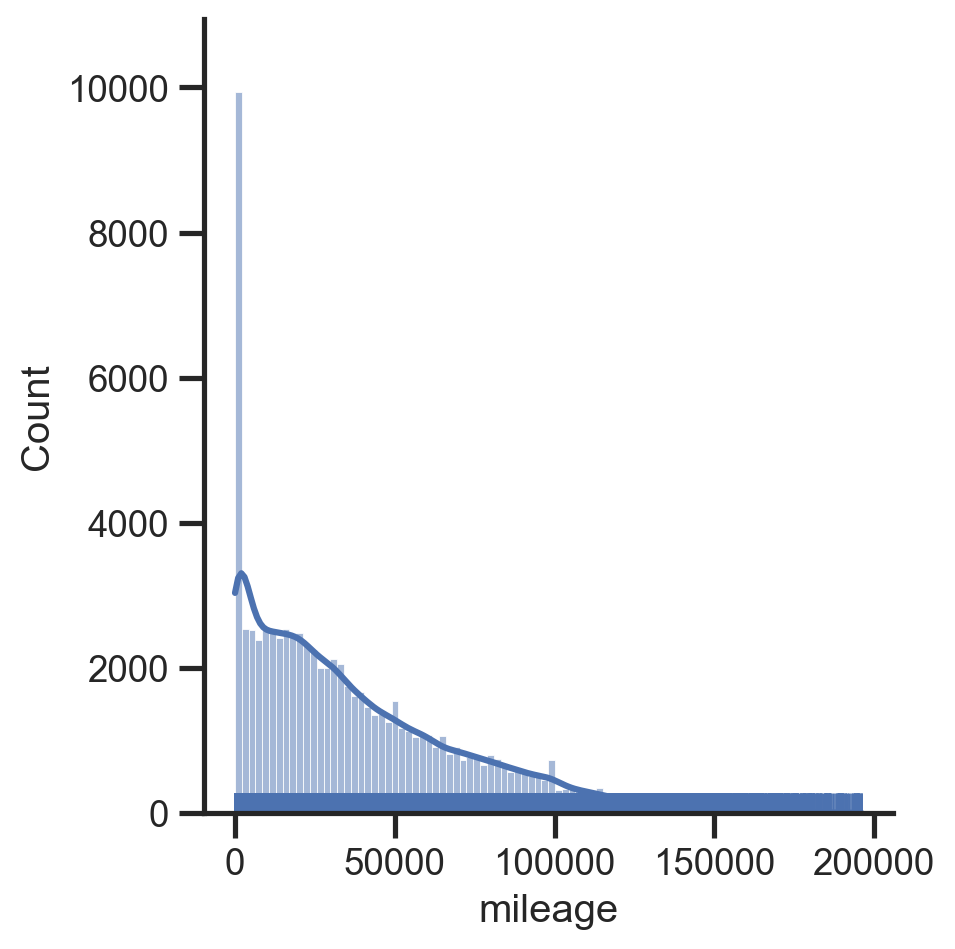

In [215]:
sns.displot(X_model['mileage'], kde=True, rug=True);

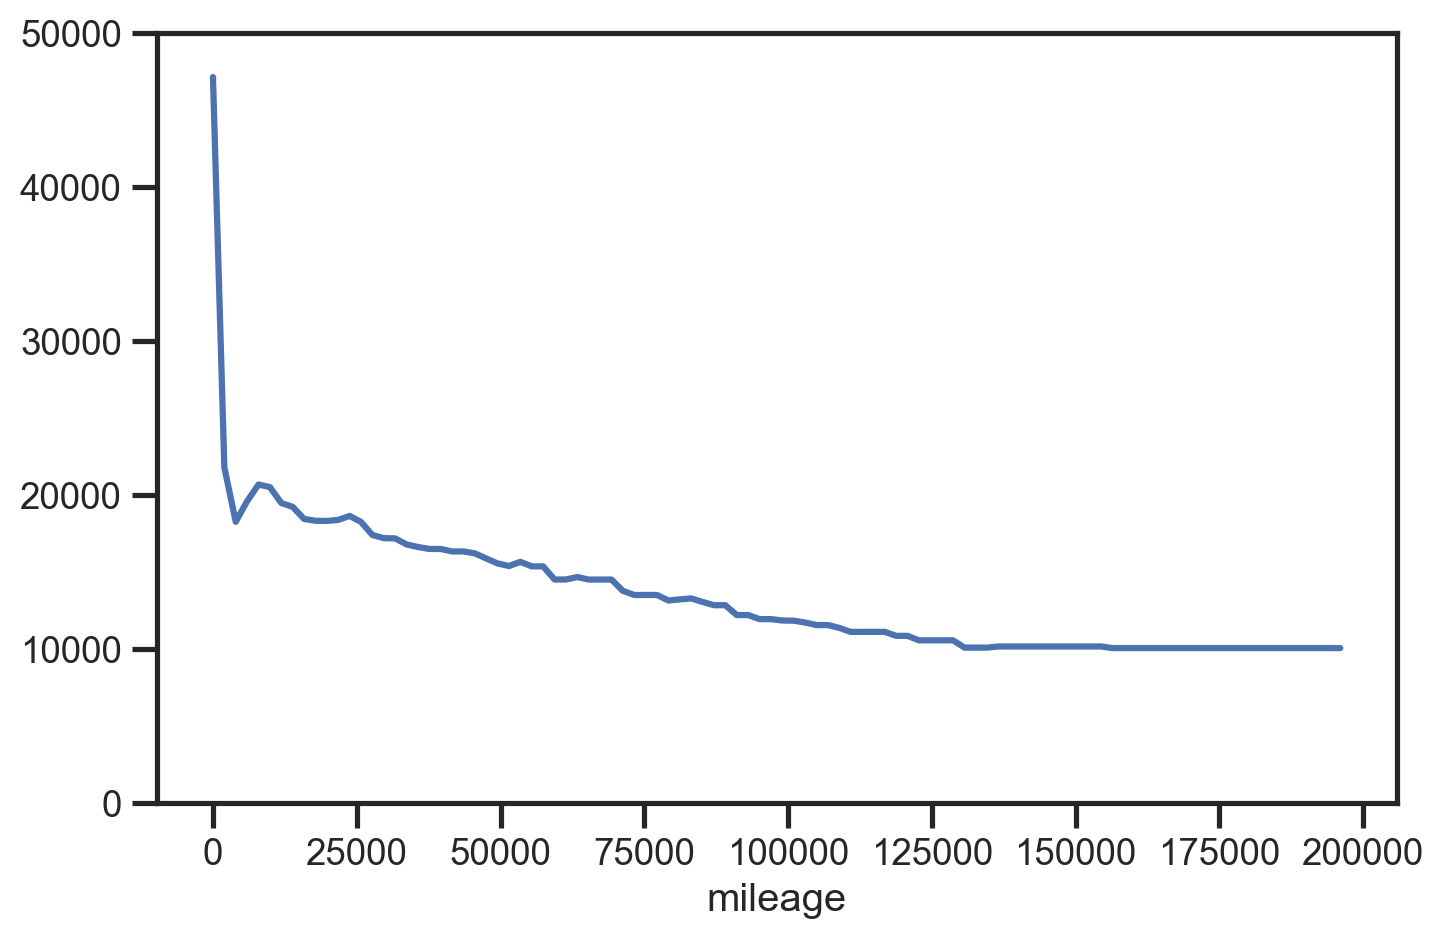

In [216]:
ax = sns.lineplot(x=synth_df['mileage'], y=pred);
ax.set_ylim(0, 50000);

### Partial Dependency Plot (PDP)

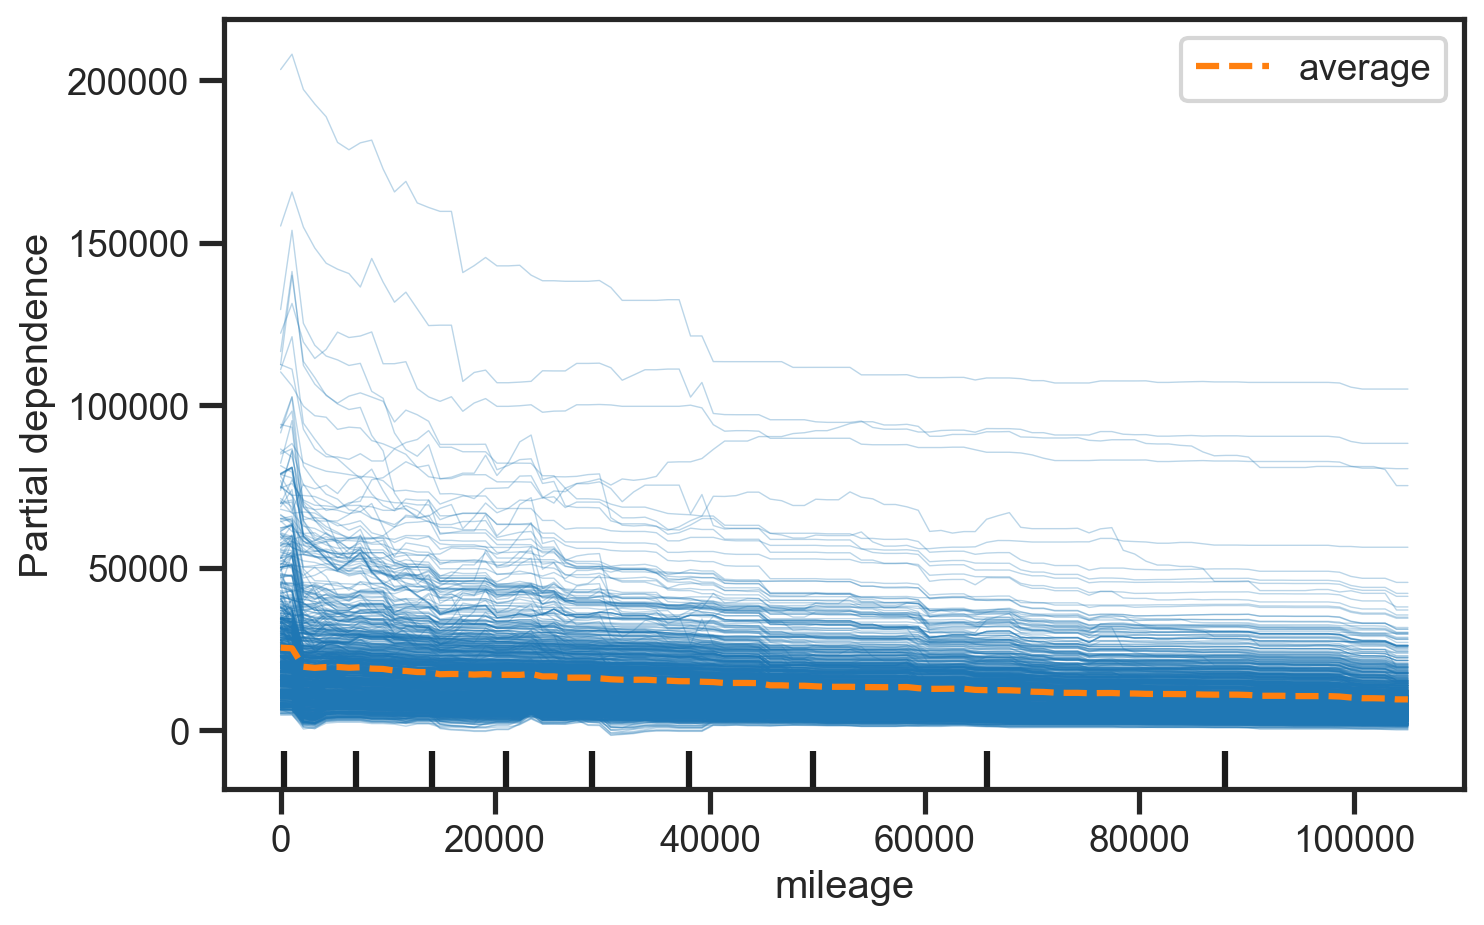

In [217]:
PartialDependenceDisplay.from_estimator(
    regr_pipe, X_model_test, features=['mileage'], kind='both'
);

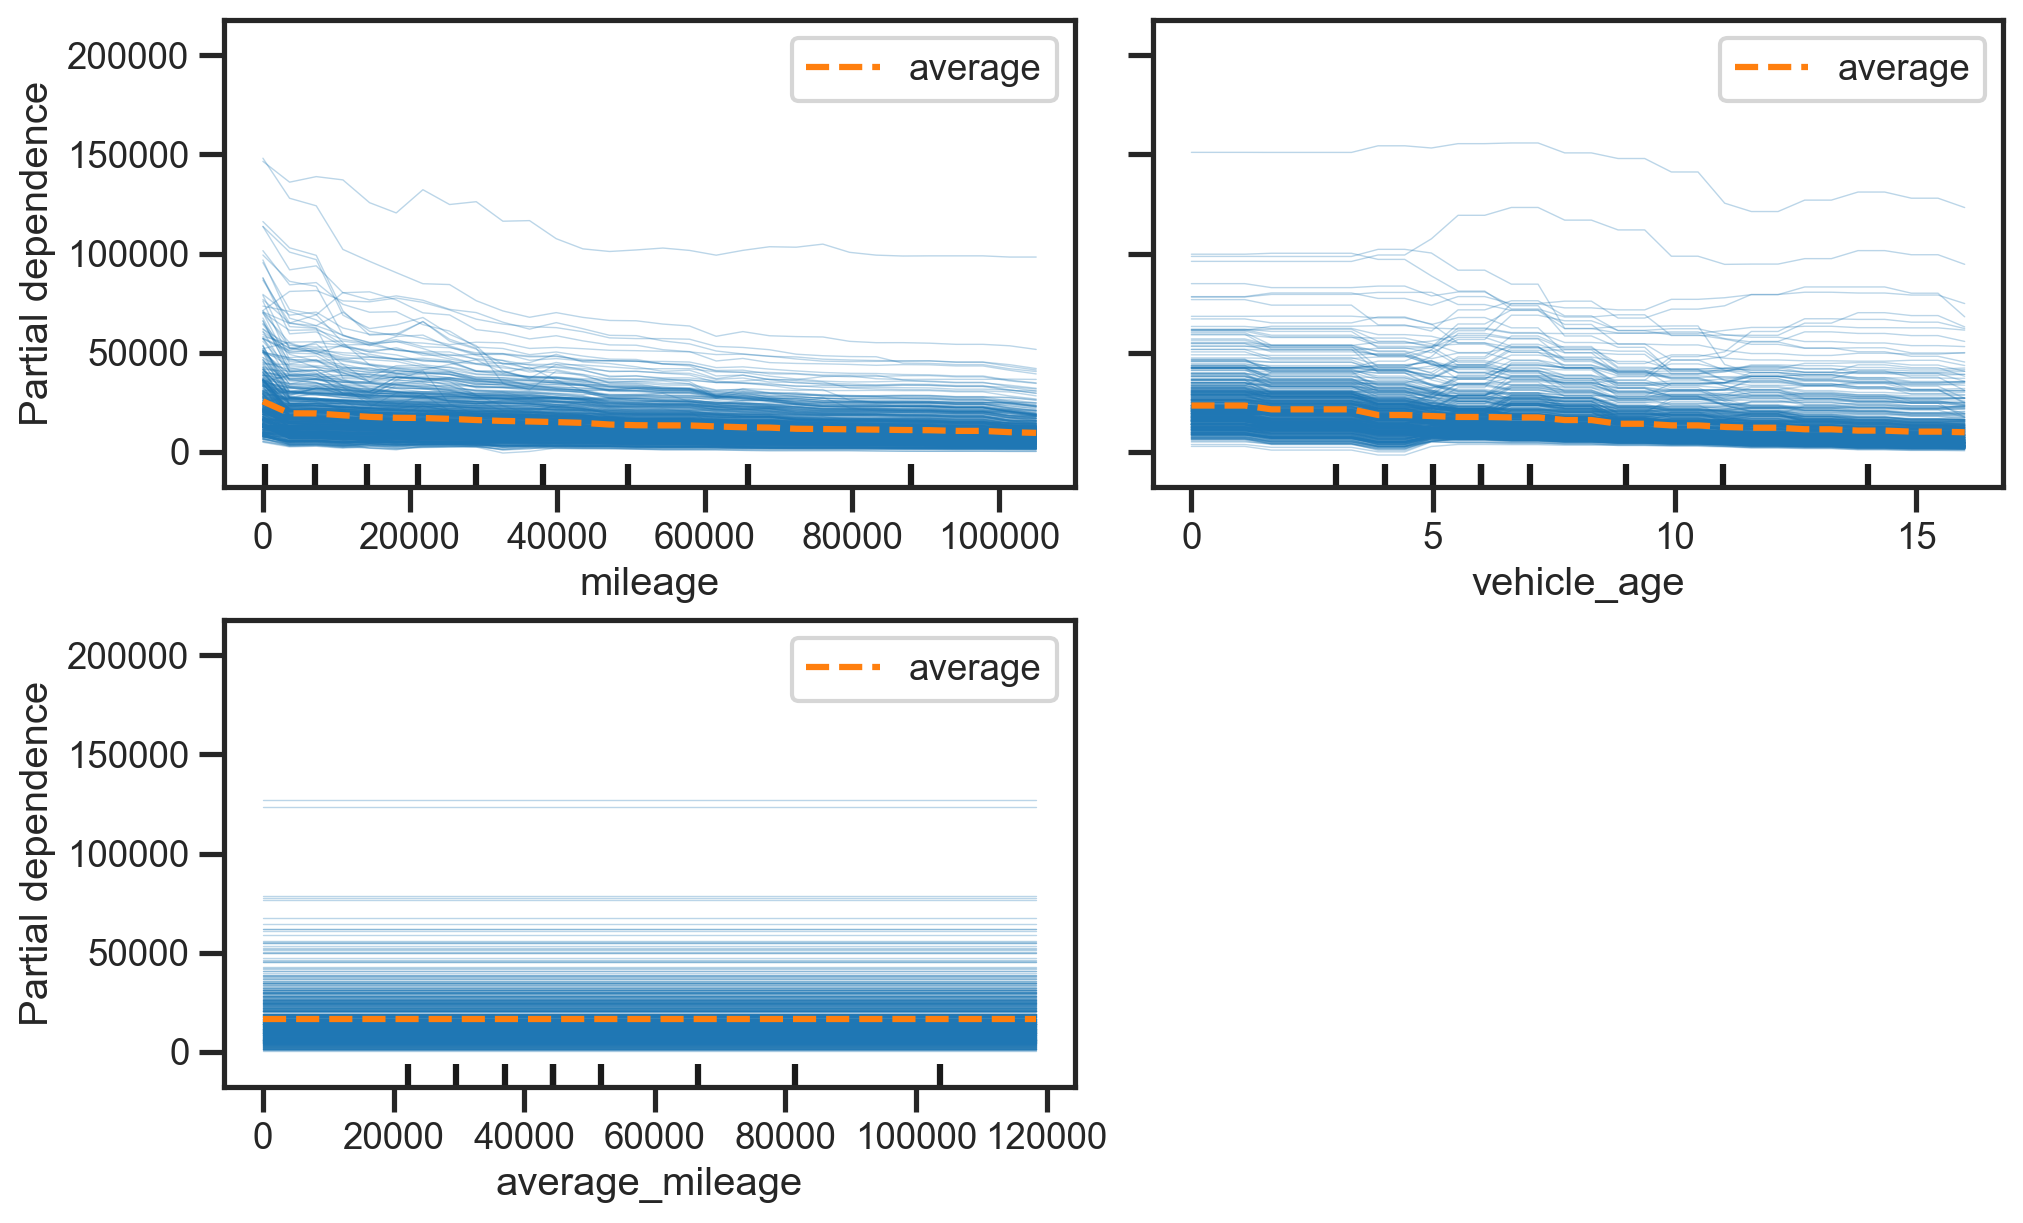

In [218]:
fig, ax = plt.subplots(figsize=(10,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    regr_pipe, X_model_test, features=X_model_test.select_dtypes(exclude='object').columns,
    kind='both',
    subsample=500, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

**Checking just the average of the non object datatypes**

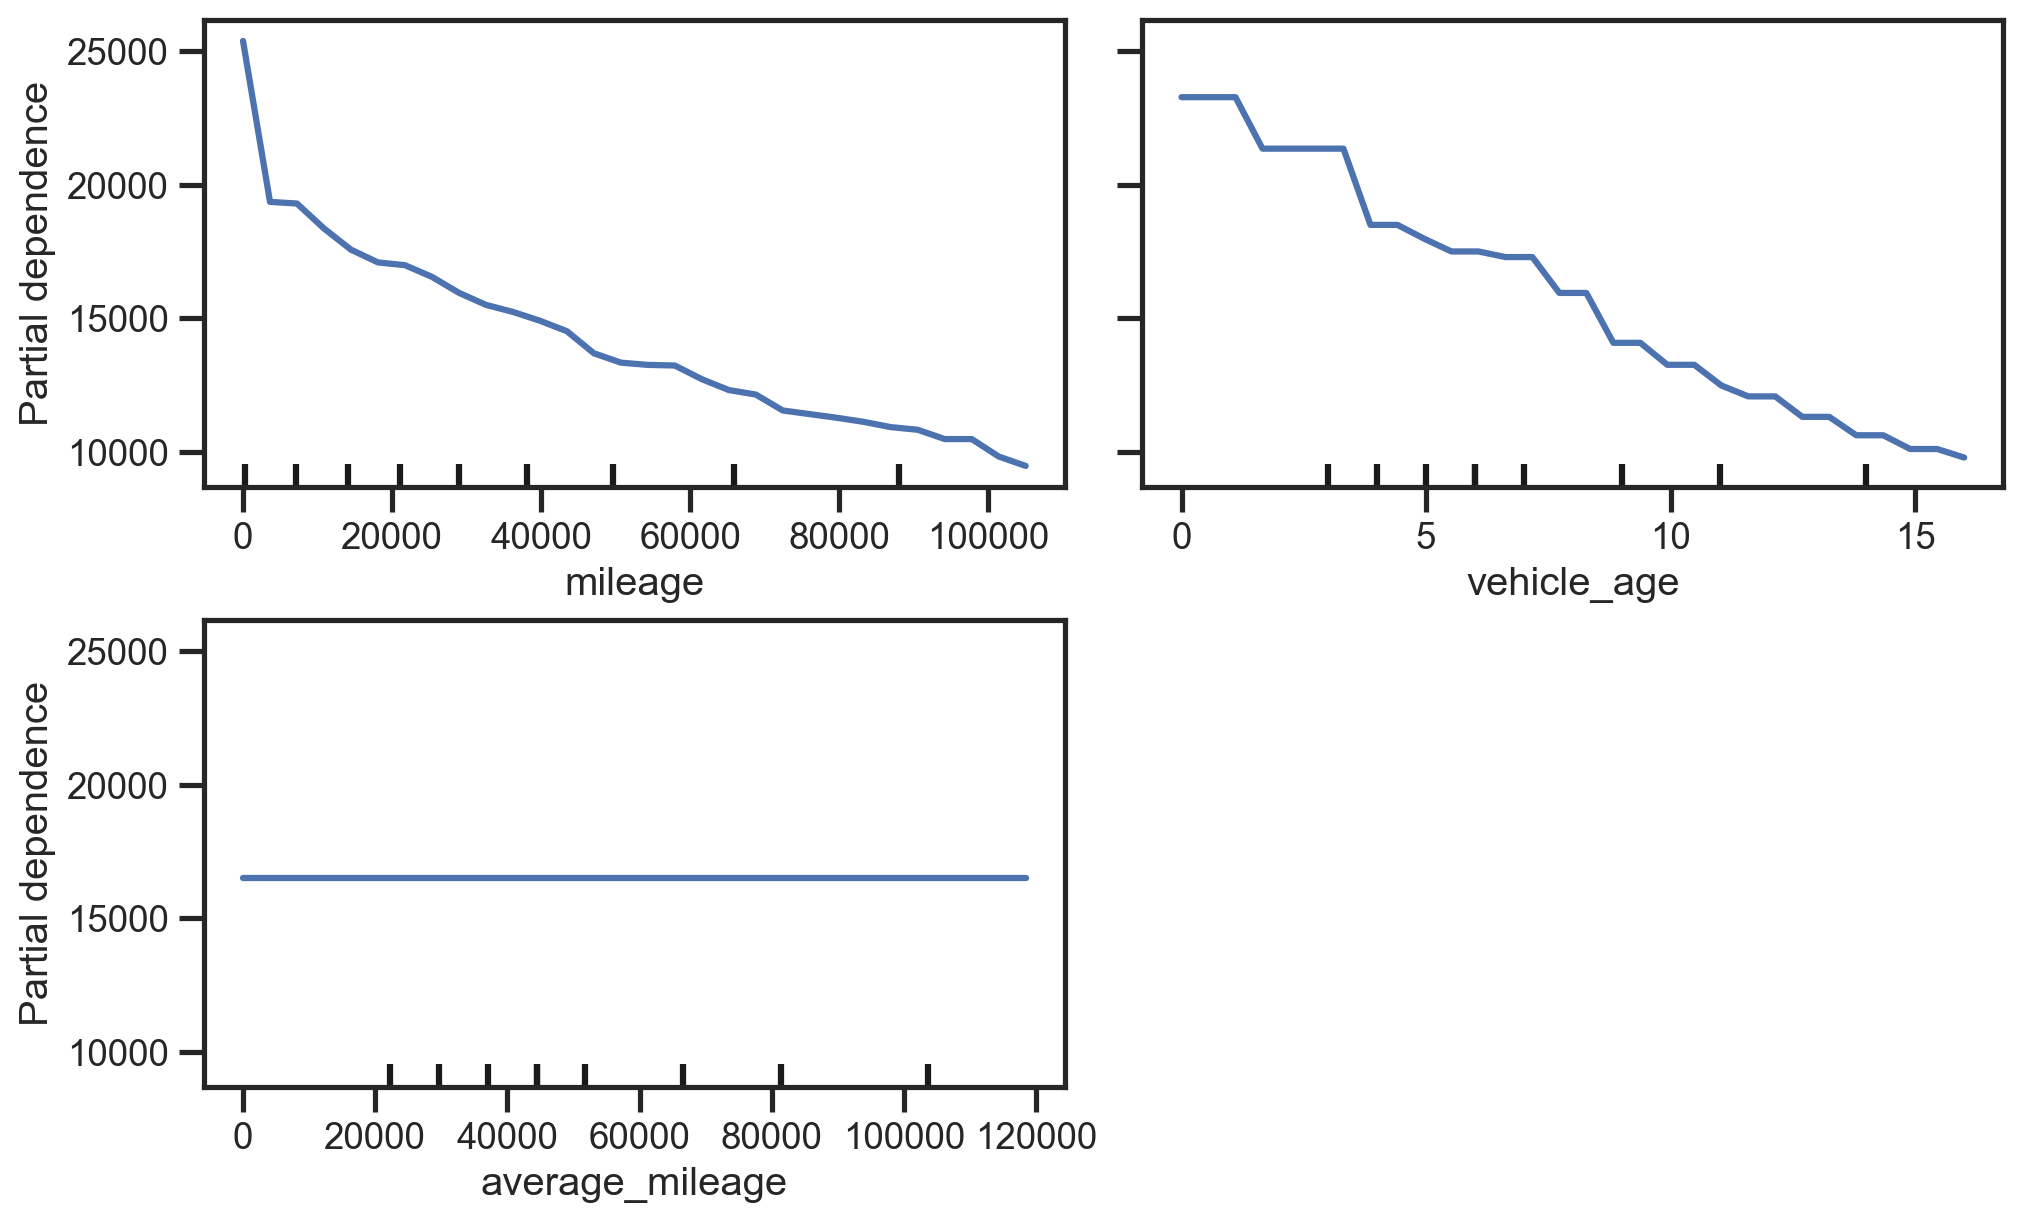

In [219]:
fig, ax = plt.subplots(figsize=(10,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    regr_pipe, X_model_test, features=X_model_test.select_dtypes(exclude='object').columns,
    kind='average',
    subsample=500, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

**The average of 2 features and their interaction**

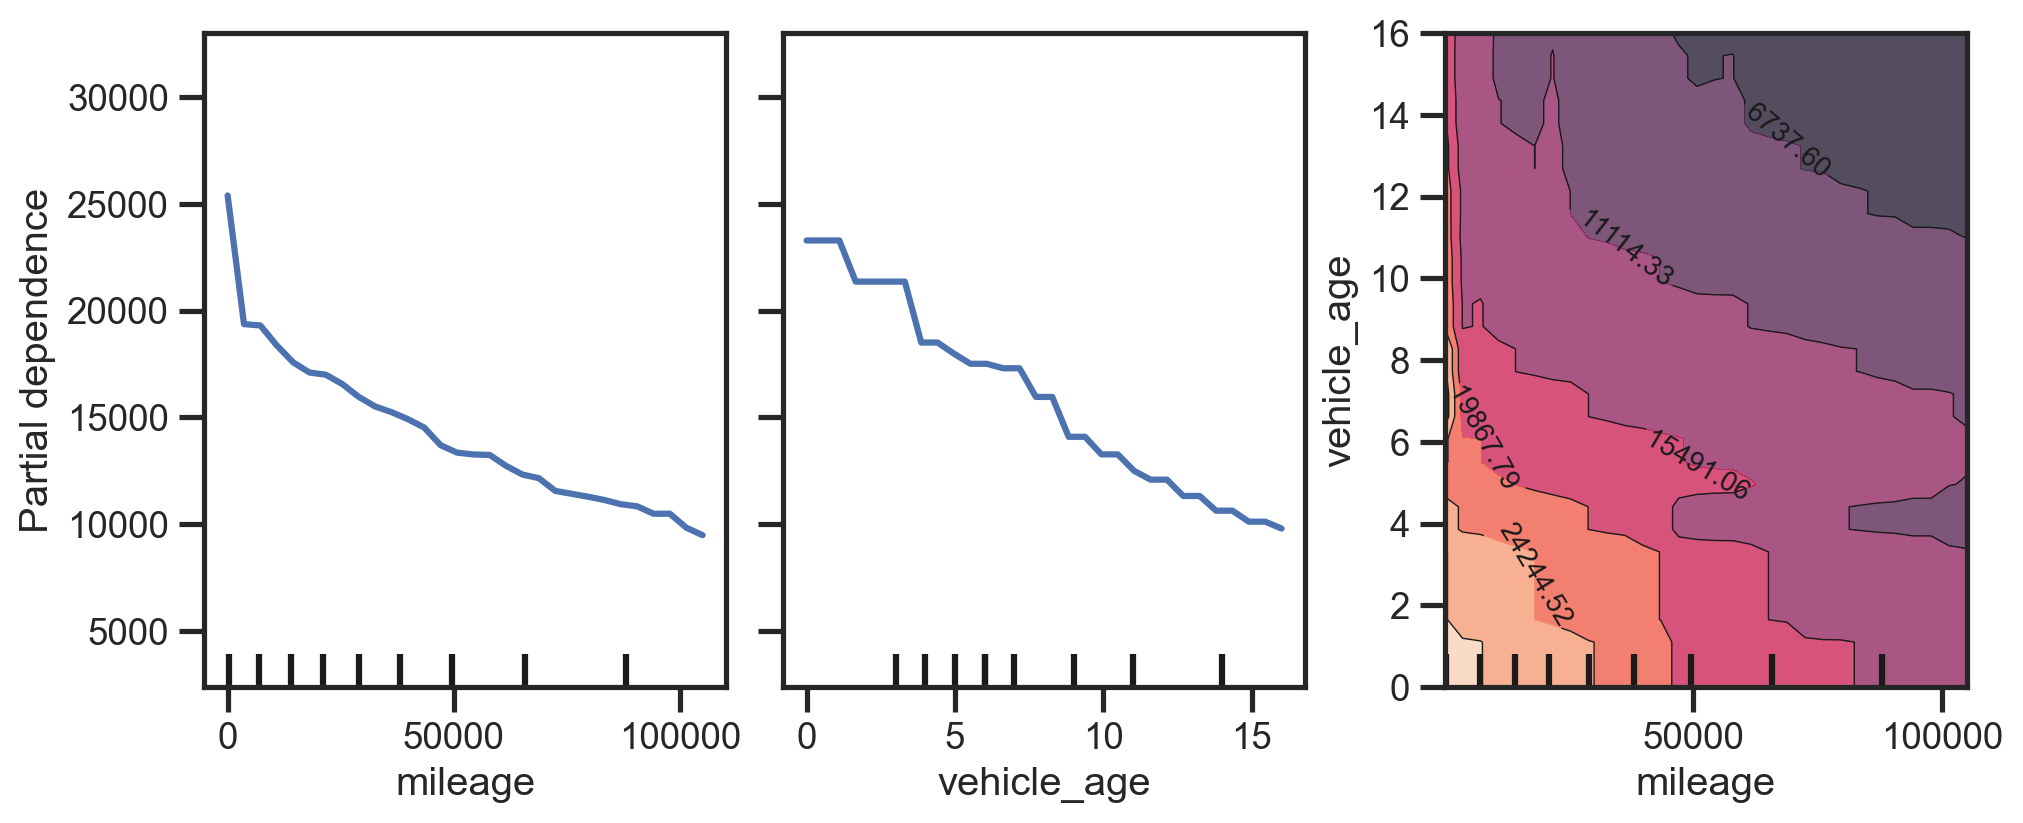

In [222]:
fig, ax = plt.subplots(figsize=(10,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    regr_pipe, X_model_test, 
    features=["mileage", "vehicle_age", ("mileage", "vehicle_age")],
    kind='average', 
    ax=ax, n_cols=3,
    subsample=500, grid_resolution=30, n_jobs=2, random_state=0,
);

# EXTRA.... HOW ABOUT WITHOUT PCA

I am doing this for my own understanding, just curious why reducing the dimention?

In [ ]:
autotrader_nopca.head()

In [ ]:
X_nopca = autotrader_nopca.drop(columns = 'price')
y_nopca = autotrader_nopca['price']

In [ ]:
X_nopca.train,X_nopca.test, y_nopca.train,y_nopca.test = train_test_split(X_nopca, y_nopca, test_size=1/4, random_state=0)

In [ ]:
poly2_npoca = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('regr', Ridge())
]).set_output(transform='pandas')

In [ ]:
param_nopca = dict(
    regr__alpha=[0.001, 0.01, 0.1, 1, 10, 100],
    polynomial__degree=[2, 3, 4]
)

In [ ]:
poly2_grid = GridSearchCV(
    poly2_npoca,
    param_nopca,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    cv=5
)

In [ ]:
poly2_grid.fit(X_nopca.train, y_nopca.train)

In [ ]:
poly2_grid_results = pd.DataFrame(poly2_grid.cv_results_)
poly2_grid_results.columns

In [ ]:
grid_rfr_results[
    ['param_max_depth','param_n_estimators', 'mean_train_score', 'std_train_score',
     'mean_test_score','std_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

In [ ]:
poly2_model = poly2_grid.best_estimator_

In [ ]:
# make predictions
predictions = poly2_model.predict(X_nopca.test)

# evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


# add the results to the models dataframe
new_row = {"Model": "PolynomialRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame(new_row, index=[0])], ignore_index=True)


### WOW, I CAN CONFIRM THE MODEL WITH PCA HAVE A BETTER SCORE